In [1]:
import logging
import matplotlib.pyplot as plt

from analyzer import GaiaAnalyzer
from analyzer import MISTFitter, BinaryMixtureFitter
from downloader import LightCurveExtractor

%load_ext autoreload
%autoreload 2

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

Holoviews not imported. Some visualizations will not be available.
/Users/jeremyng/conda/envs/iso_arm/lib/python3.9/site-packages/lightkurve/prf/__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(


In [2]:
# some statements to make the figures look nicer 
%config InlineBackend.figure_format='retina'
plt.rcParams.update({'axes.linewidth' : 1,
                     'ytick.major.width' : 1,
                     'ytick.minor.width' : 1,
                     'xtick.major.width' : 1,
                     'xtick.minor.width' : 1,
                     'xtick.labelsize': 10, 
                     'ytick.labelsize': 10,
                     'axes.labelsize': 12,
                    
                     'font.family': 'Serif',
                     'figure.figsize': (10, 6)
                    })

In [3]:
gaia_analyzer = GaiaAnalyzer(filename='data/gaia.csv')
gaia_analyzer.get_data()

df = gaia_analyzer.get_data().copy()
df.head()

source_id         ra        dec   parallax  parallax_unc  \
0   3763976194792448  45.276791   5.006404   7.954515      0.019097   
1  11352324413414016  52.860503   7.796339   8.422533      0.035354   
2  19817739313090688  39.568739   7.965070  12.499952      0.160662   
3  43733079289895424  56.558523  17.154376  18.583617      0.023517   
4  46438771249859840  61.218048  17.464281   7.537225      0.097988   

        pmra  pmra_error       pmdec  pmdec_error      G_mag  ...  logg  \
0  24.526128    0.023404  -45.727224     0.017959   9.279200  ...  3.95   
1  24.168420    0.050407  -50.147355     0.035200  13.830488  ...   NaN   
2  43.608250    0.172182  -71.069385     0.178885  18.442486  ...   NaN   
3  49.660663    0.026018 -111.754468     0.019403  12.016204  ...   NaN   
4  18.629909    0.107982  -46.349503     0.063953  13.154690  ...  5.04   

   logg_gspspec_lower  logg_gspspec_upper  phot_bp_rp  BP_mag_unc  RP_mag_unc  \
0                3.78                4.06    0.720543    0.000650    0.000533   
1                 NaN                 NaN    2.155826    0.001755    0.000591   
2                 NaN                 NaN    0.715567    0.035904    0.030820   
3                 NaN                 NaN    2.040105    0.006811    0.003703   
4                4.60                5.20    2.051896    0.002722    0.001453   

   G_mag_unc   teff_unc  logg_unc  distance_unc  
0   0.000192   2.645996      0.14      0.308952  
1   0.000444   4.344116       NaN      3.102100  
2   0.002122        NaN       NaN           NaN  
3   0.001573        NaN       NaN           NaN  
4   0.000786  11.991455      0.30      1.777851  

[5 rows x 37 columns]

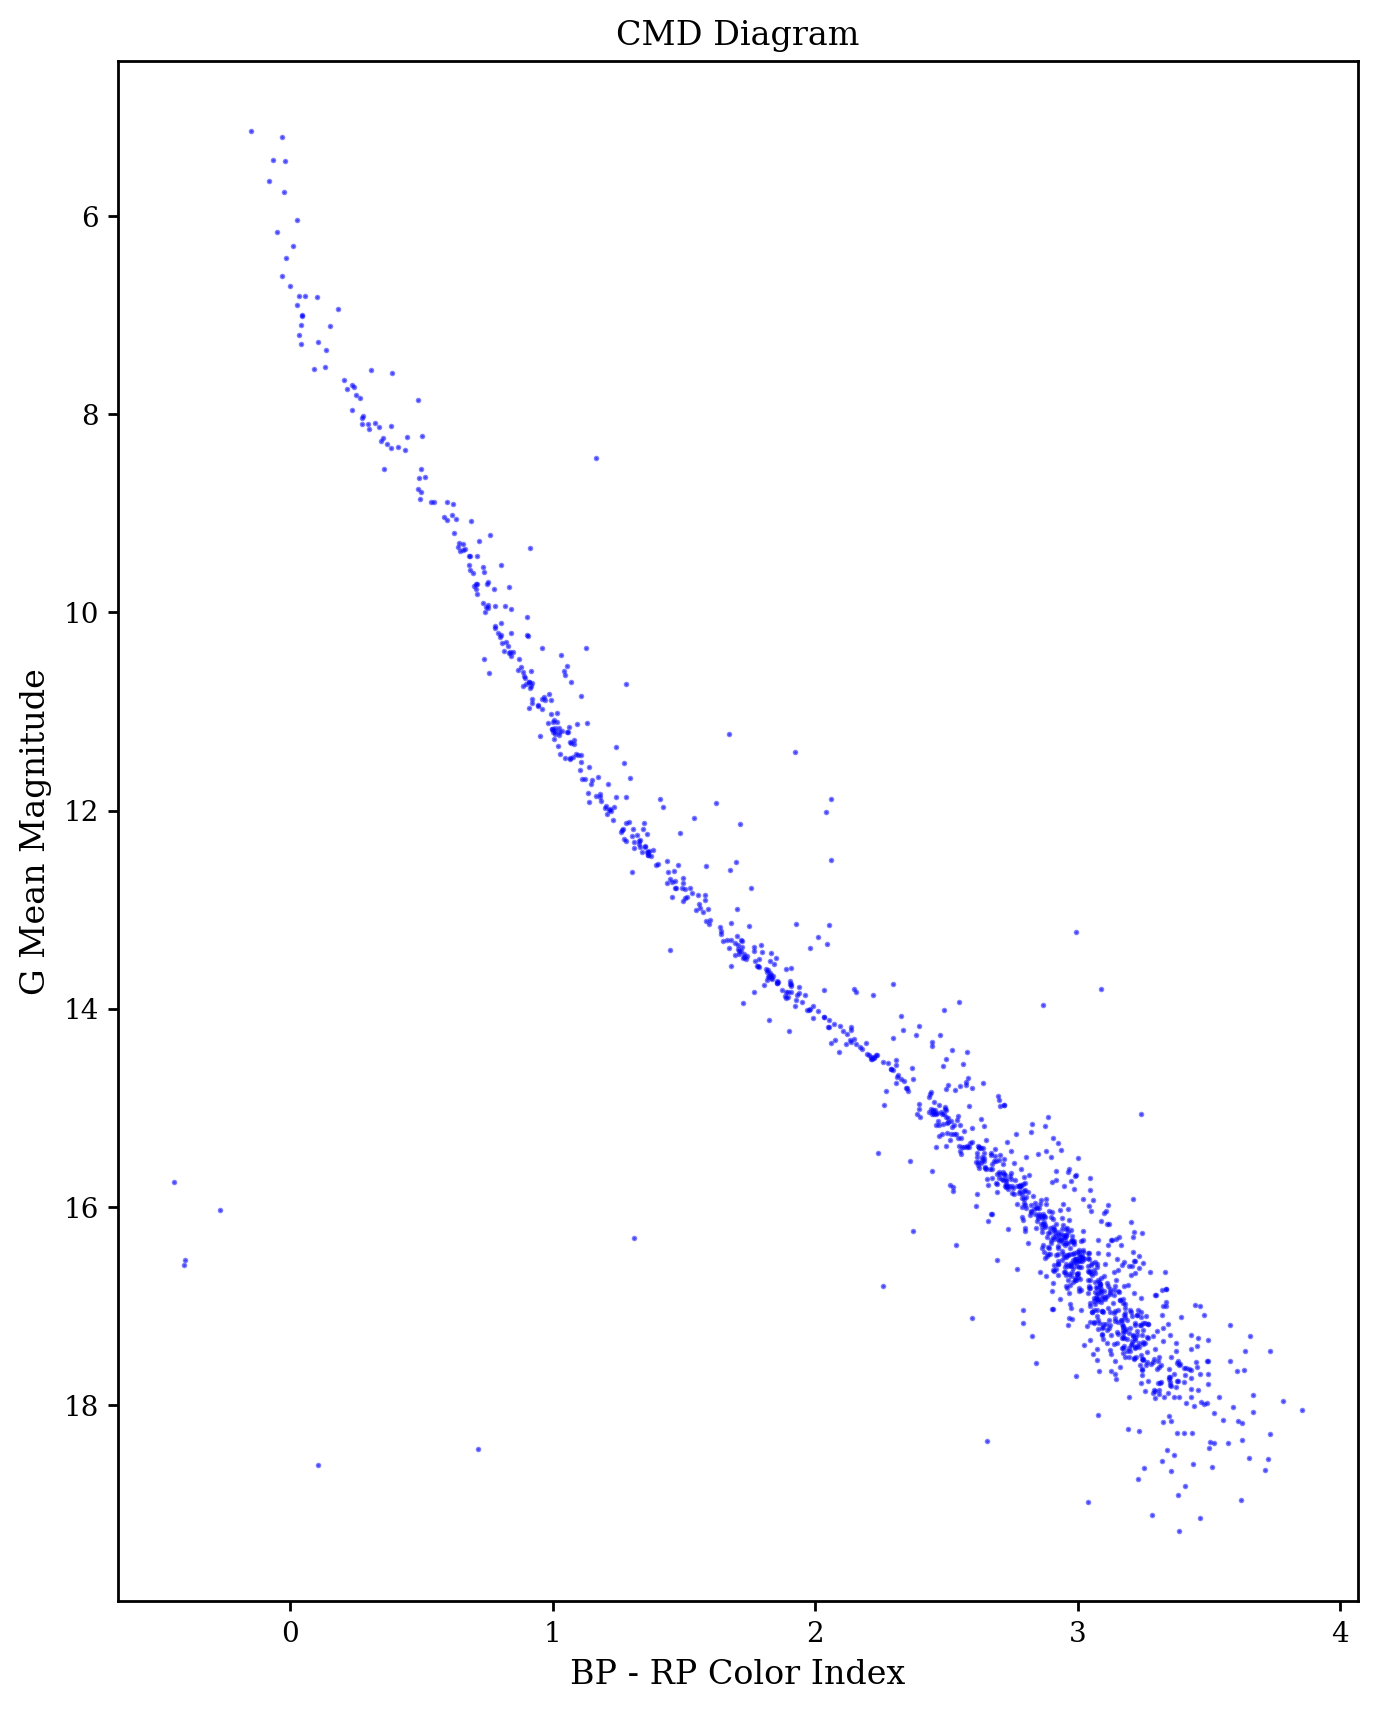

(<Figure size 800x1000 with 1 Axes>,
 <Axes: title={'center': 'CMD Diagram'}, xlabel='BP - RP Color Index', ylabel='G Mean Magnitude'>)

In [4]:
gaia_analyzer.plot_hr_diagram(show=True)

In [5]:
fitter = MISTFitter(data=df, age_range=(70e6, 160e6))

In [6]:
sampler = fitter.sample_cluster(n_walkers=32, n_burn=200, n_steps=2000)

100%|██████████| 2000/2000 [06:43<00:00,  4.95it/s]


Median cluster parameters:
Age=7.48e+07 yr, [Fe/H]=0.26, Distance=142.5 pc, A_V=0.16


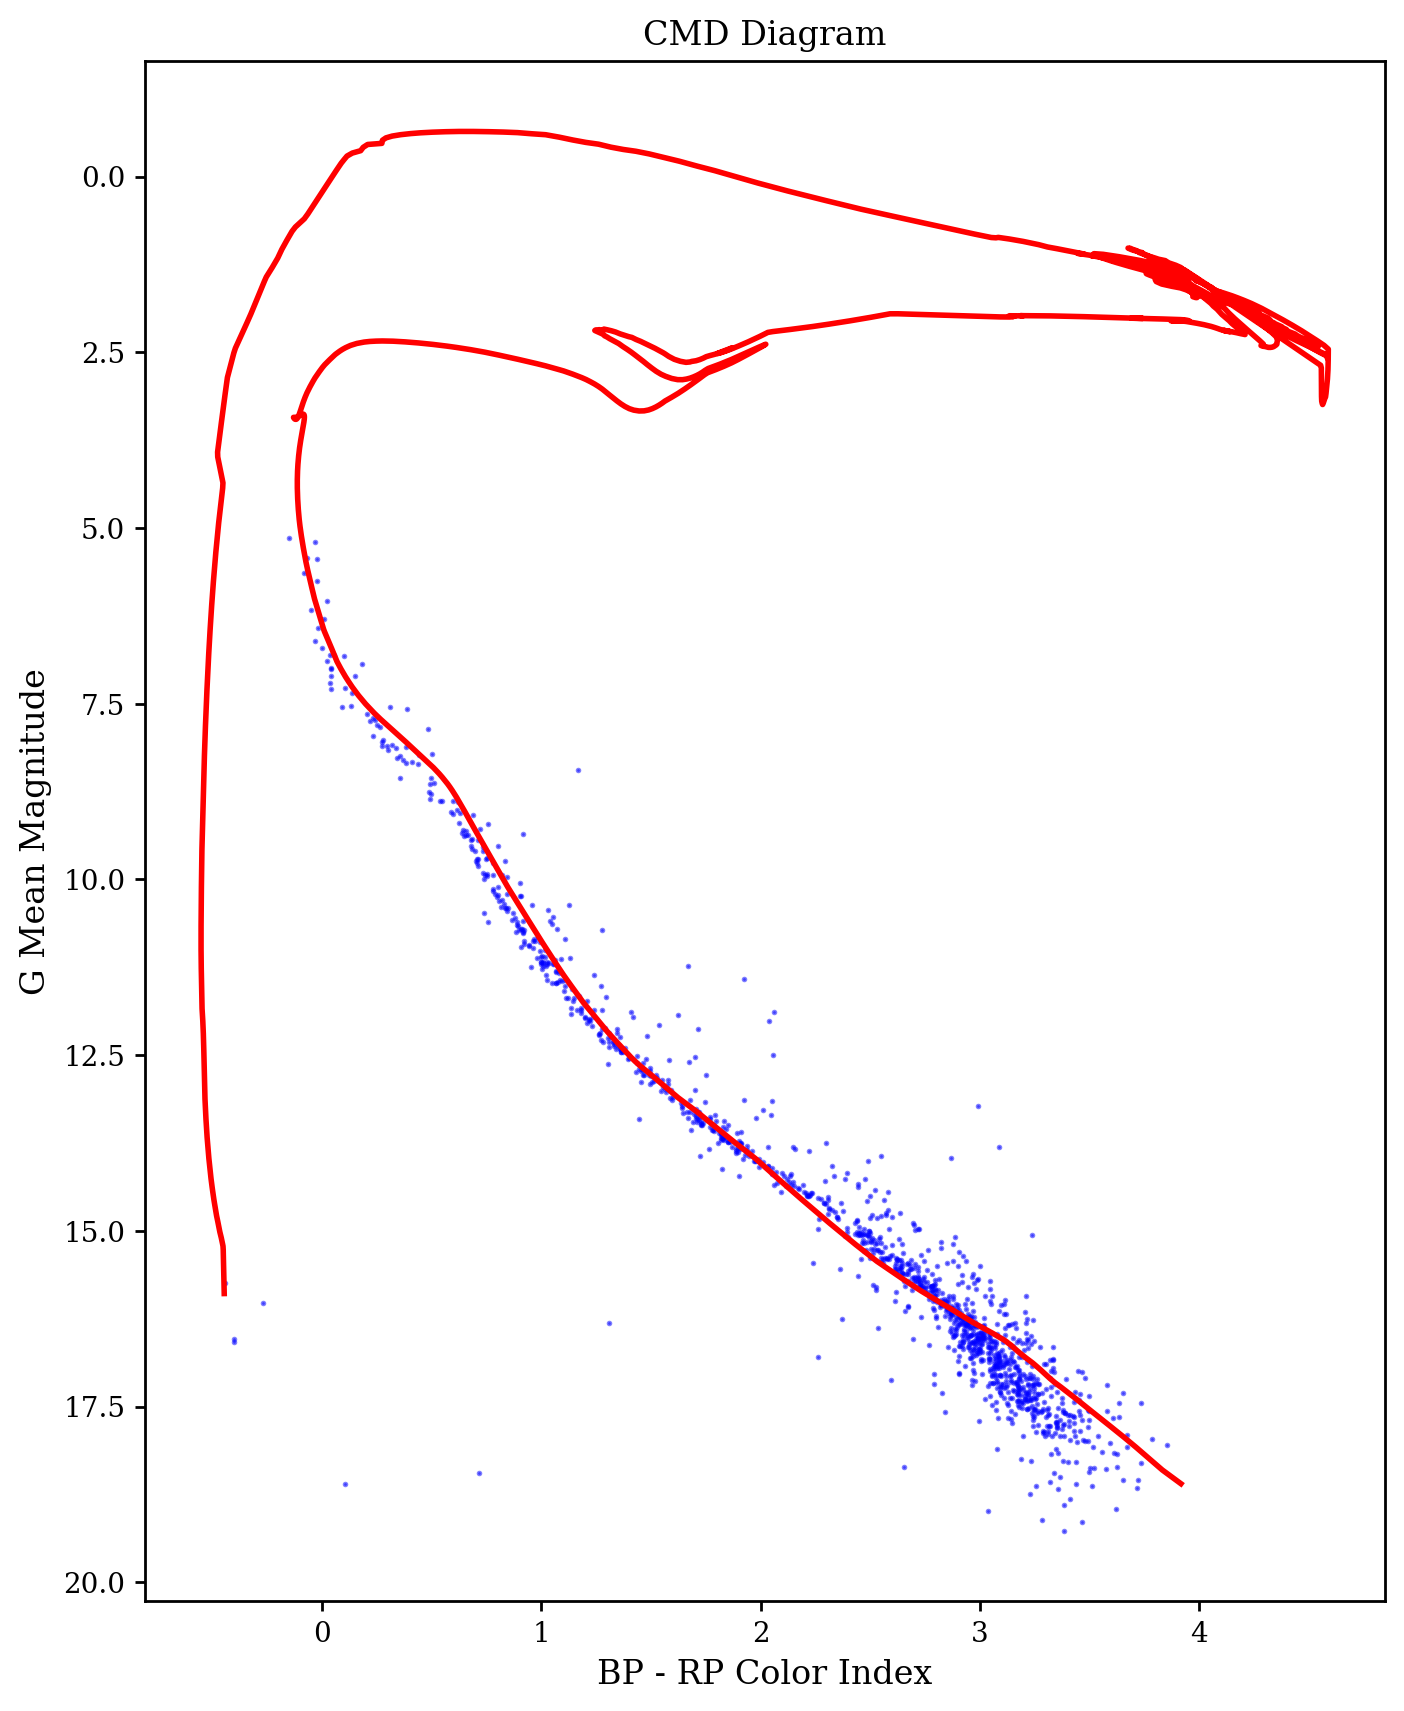

(<Figure size 800x1000 with 1 Axes>,
 <Axes: title={'center': 'CMD Diagram'}, xlabel='BP - RP Color Index', ylabel='G Mean Magnitude'>)

In [7]:
# Step 3: Inspect posterior
samples = fitter.get_samples()
median_params = fitter.get_median_model()
print(f"Median cluster parameters:\nAge={median_params[0]:.2e} yr, [Fe/H]={median_params[1]:.2f}, "
      f"Distance={median_params[2]:.1f} pc, A_V={median_params[3]:.2f}")

# Step 4: Plot median
fitter.plot_isochrone(median_params)

Best cluster parameters:
Age=7.48e+07 yr, [Fe/H]=0.26, Distance=142.5 pc, A_V=0.16


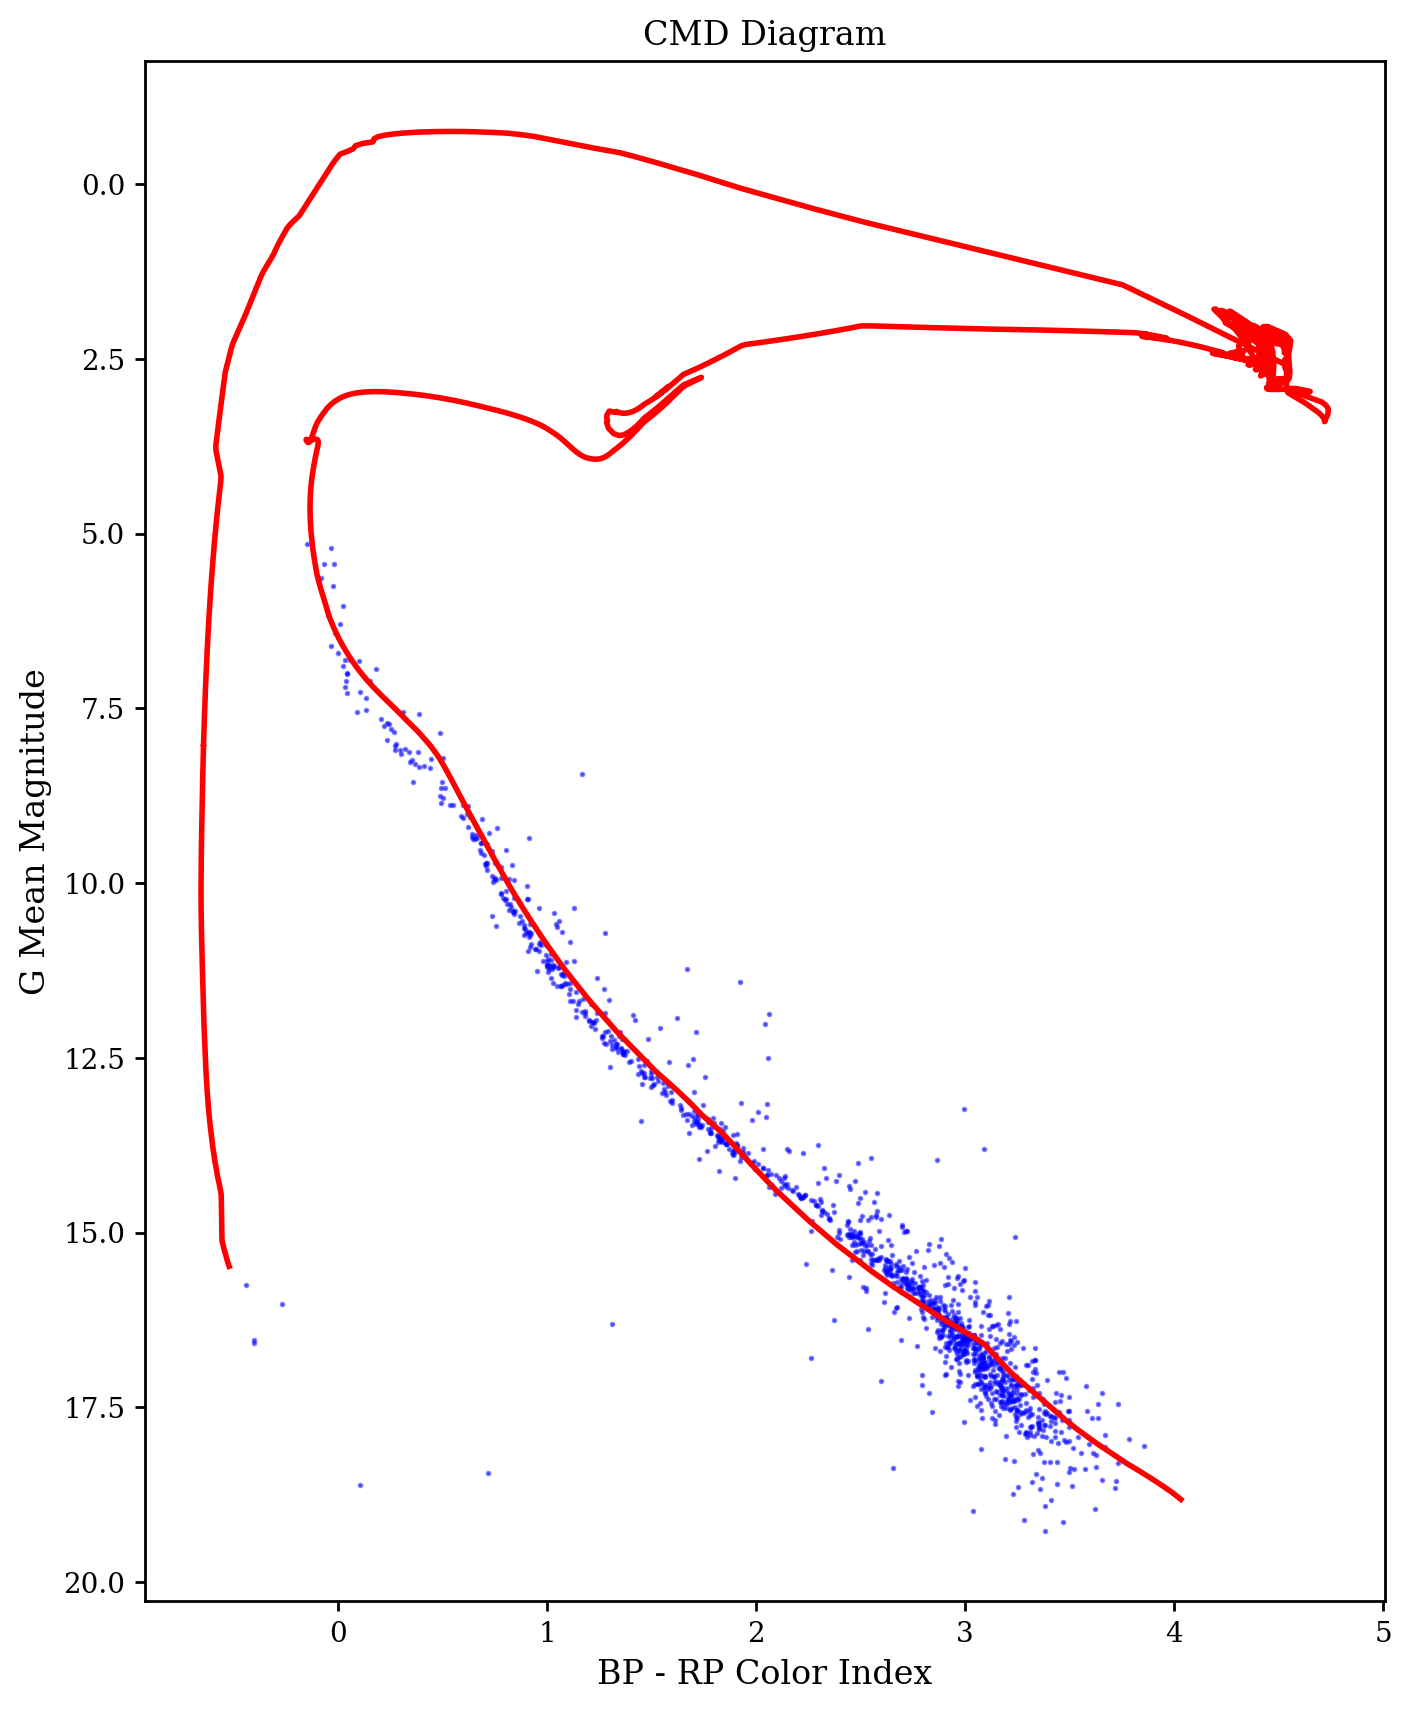

(<Figure size 800x1000 with 1 Axes>,
 <Axes: title={'center': 'CMD Diagram'}, xlabel='BP - RP Color Index', ylabel='G Mean Magnitude'>)

In [8]:
# Step 5: plot best model
best_params = fitter.get_best_model()
print(f"Best cluster parameters:\nAge={median_params[0]:.2e} yr, [Fe/H]={median_params[1]:.2f}, "
      f"Distance={median_params[2]:.1f} pc, A_V={median_params[3]:.2f}")

# Step 4: Plot median
fitter.plot_isochrone(best_params)

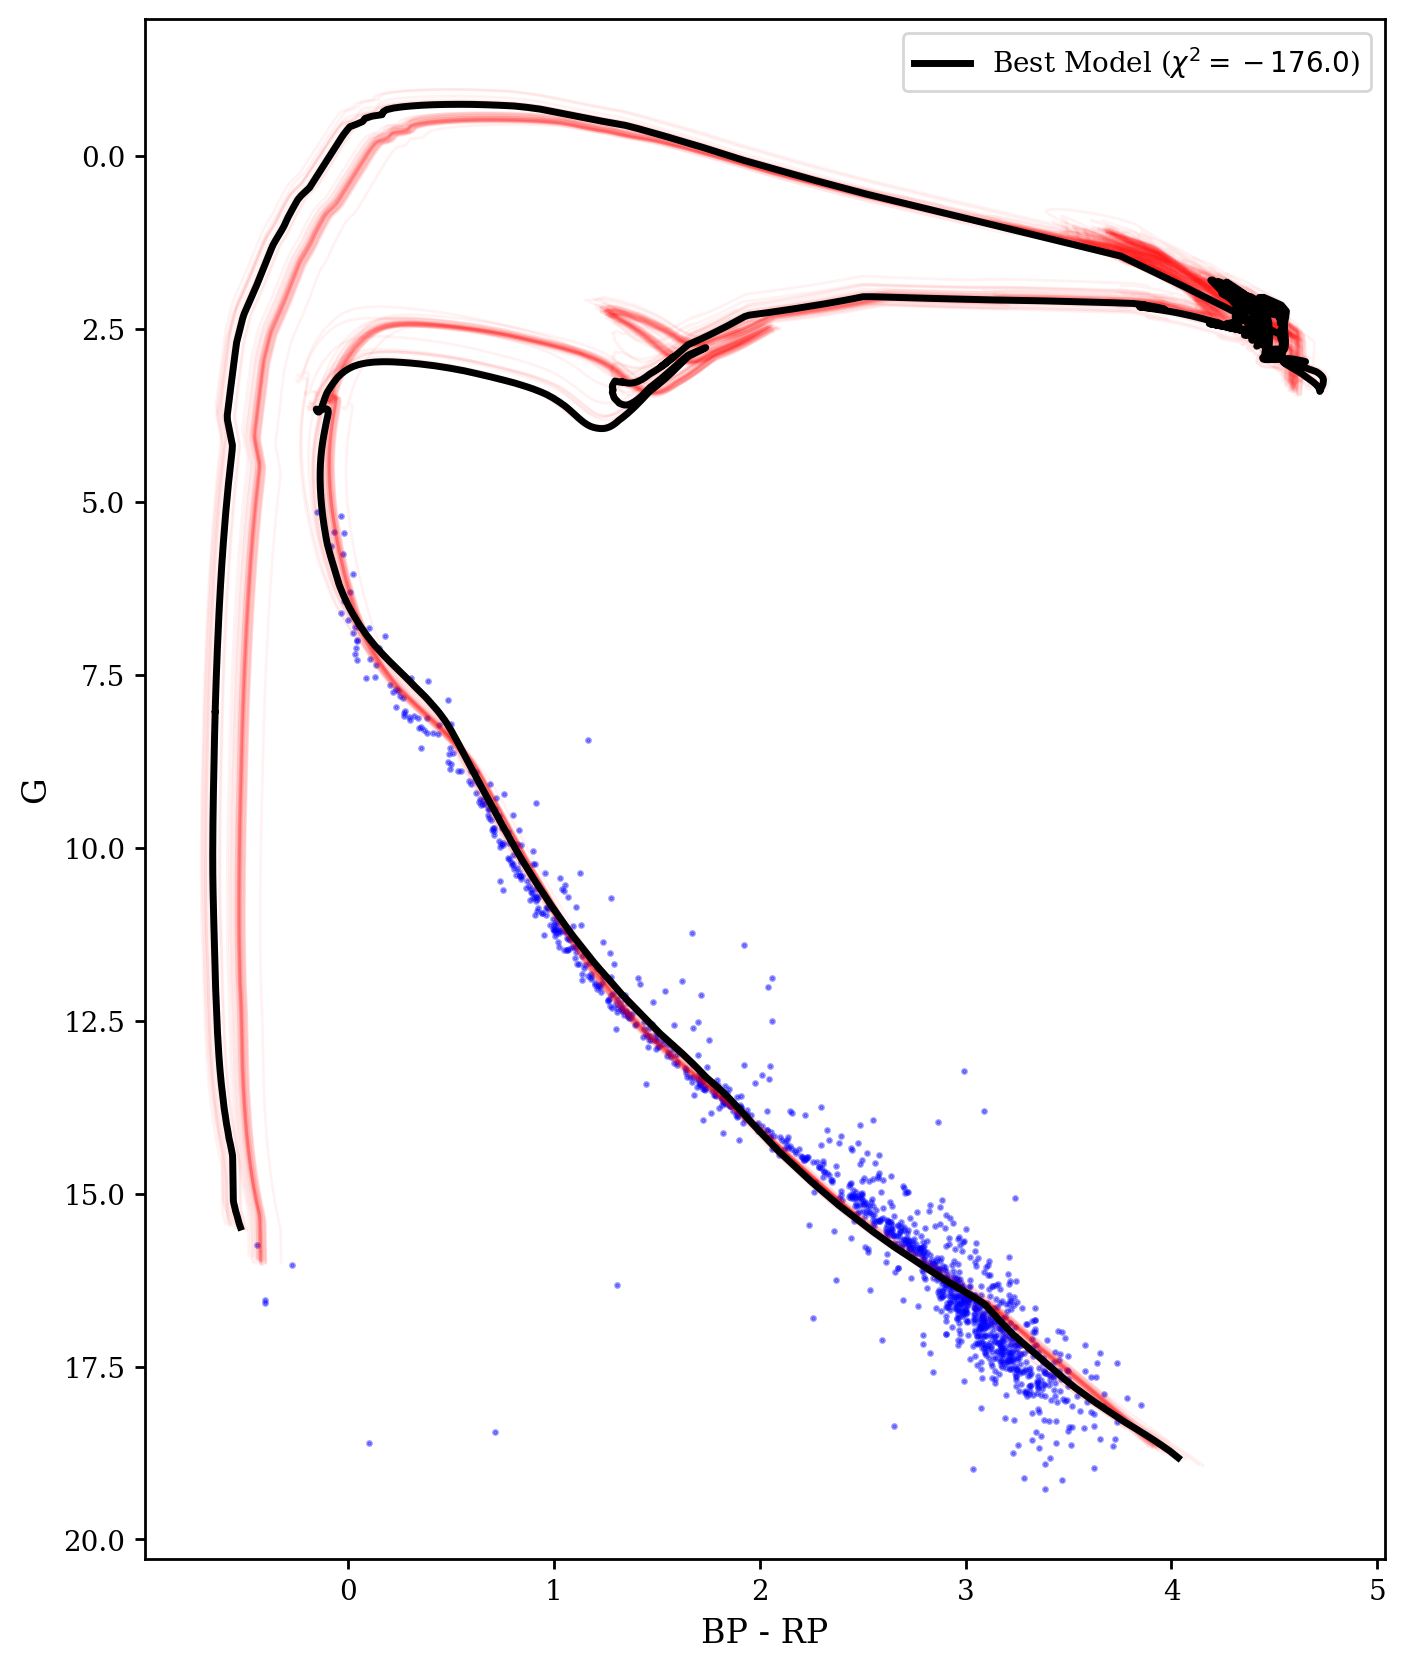

(<Figure size 800x1000 with 1 Axes>, <Axes: xlabel='BP - RP', ylabel='G'>)

In [9]:
fitter.plot_good_isochrones(chi2_cutoff=1)

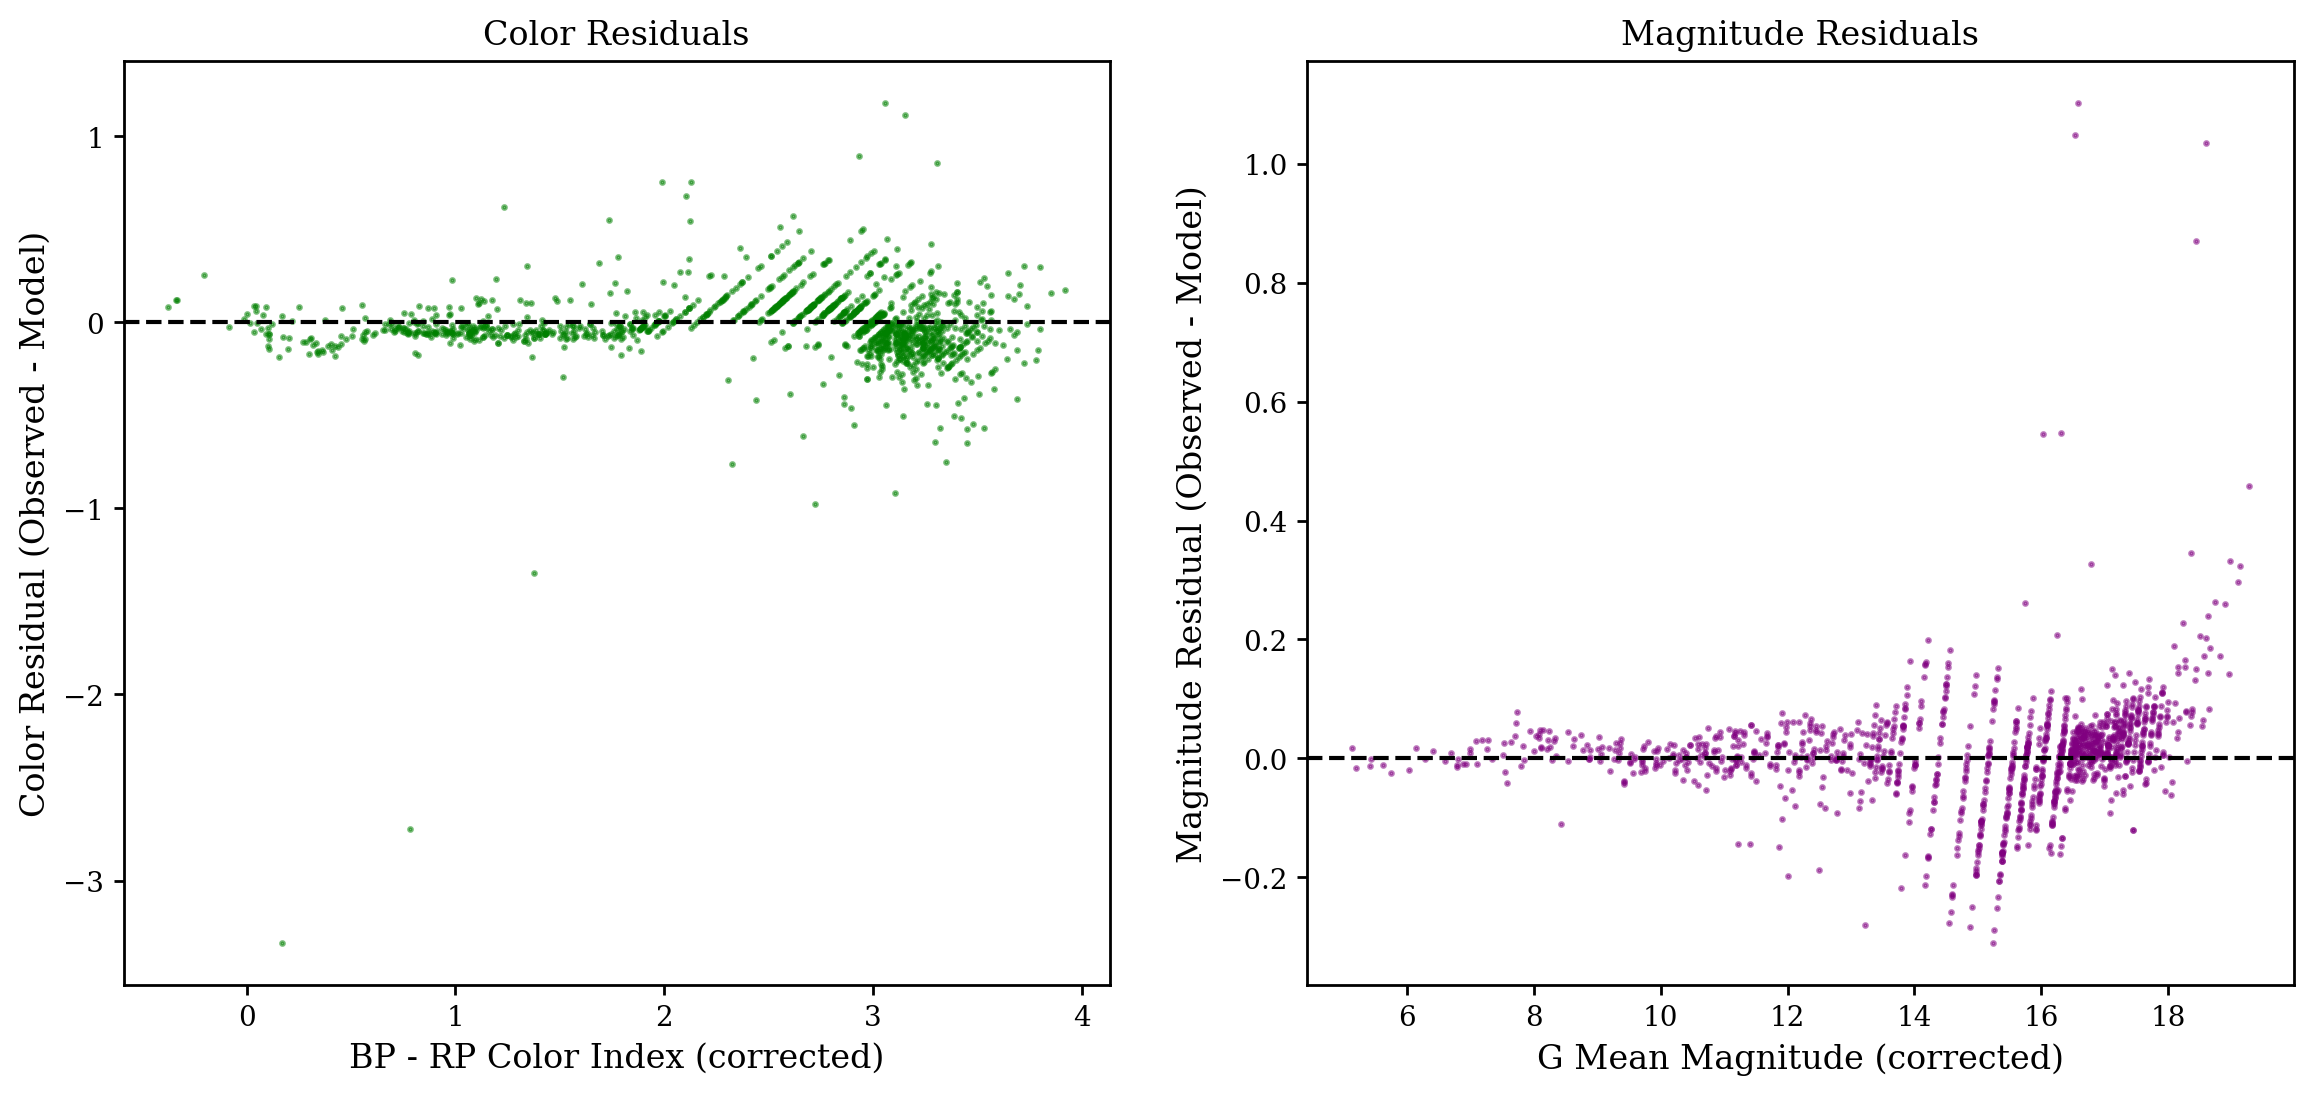

(<Figure size 1400x600 with 2 Axes>,
 (<Axes: title={'center': 'Color Residuals'}, xlabel='BP - RP Color Index (corrected)', ylabel='Color Residual (Observed - Model)'>,
  <Axes: title={'center': 'Magnitude Residuals'}, xlabel='G Mean Magnitude (corrected)', ylabel='Magnitude Residual (Observed - Model)'>))

In [10]:
fitter.plot_residuals(theta=fitter.get_best_model())

In [11]:
fitter.bic()

394.9570625159616

2025-11-13 01:02:20,936 - WARNING - Too few points to create valid contours
2025-11-13 01:02:20,986 - WARNING - Too few points to create valid contours


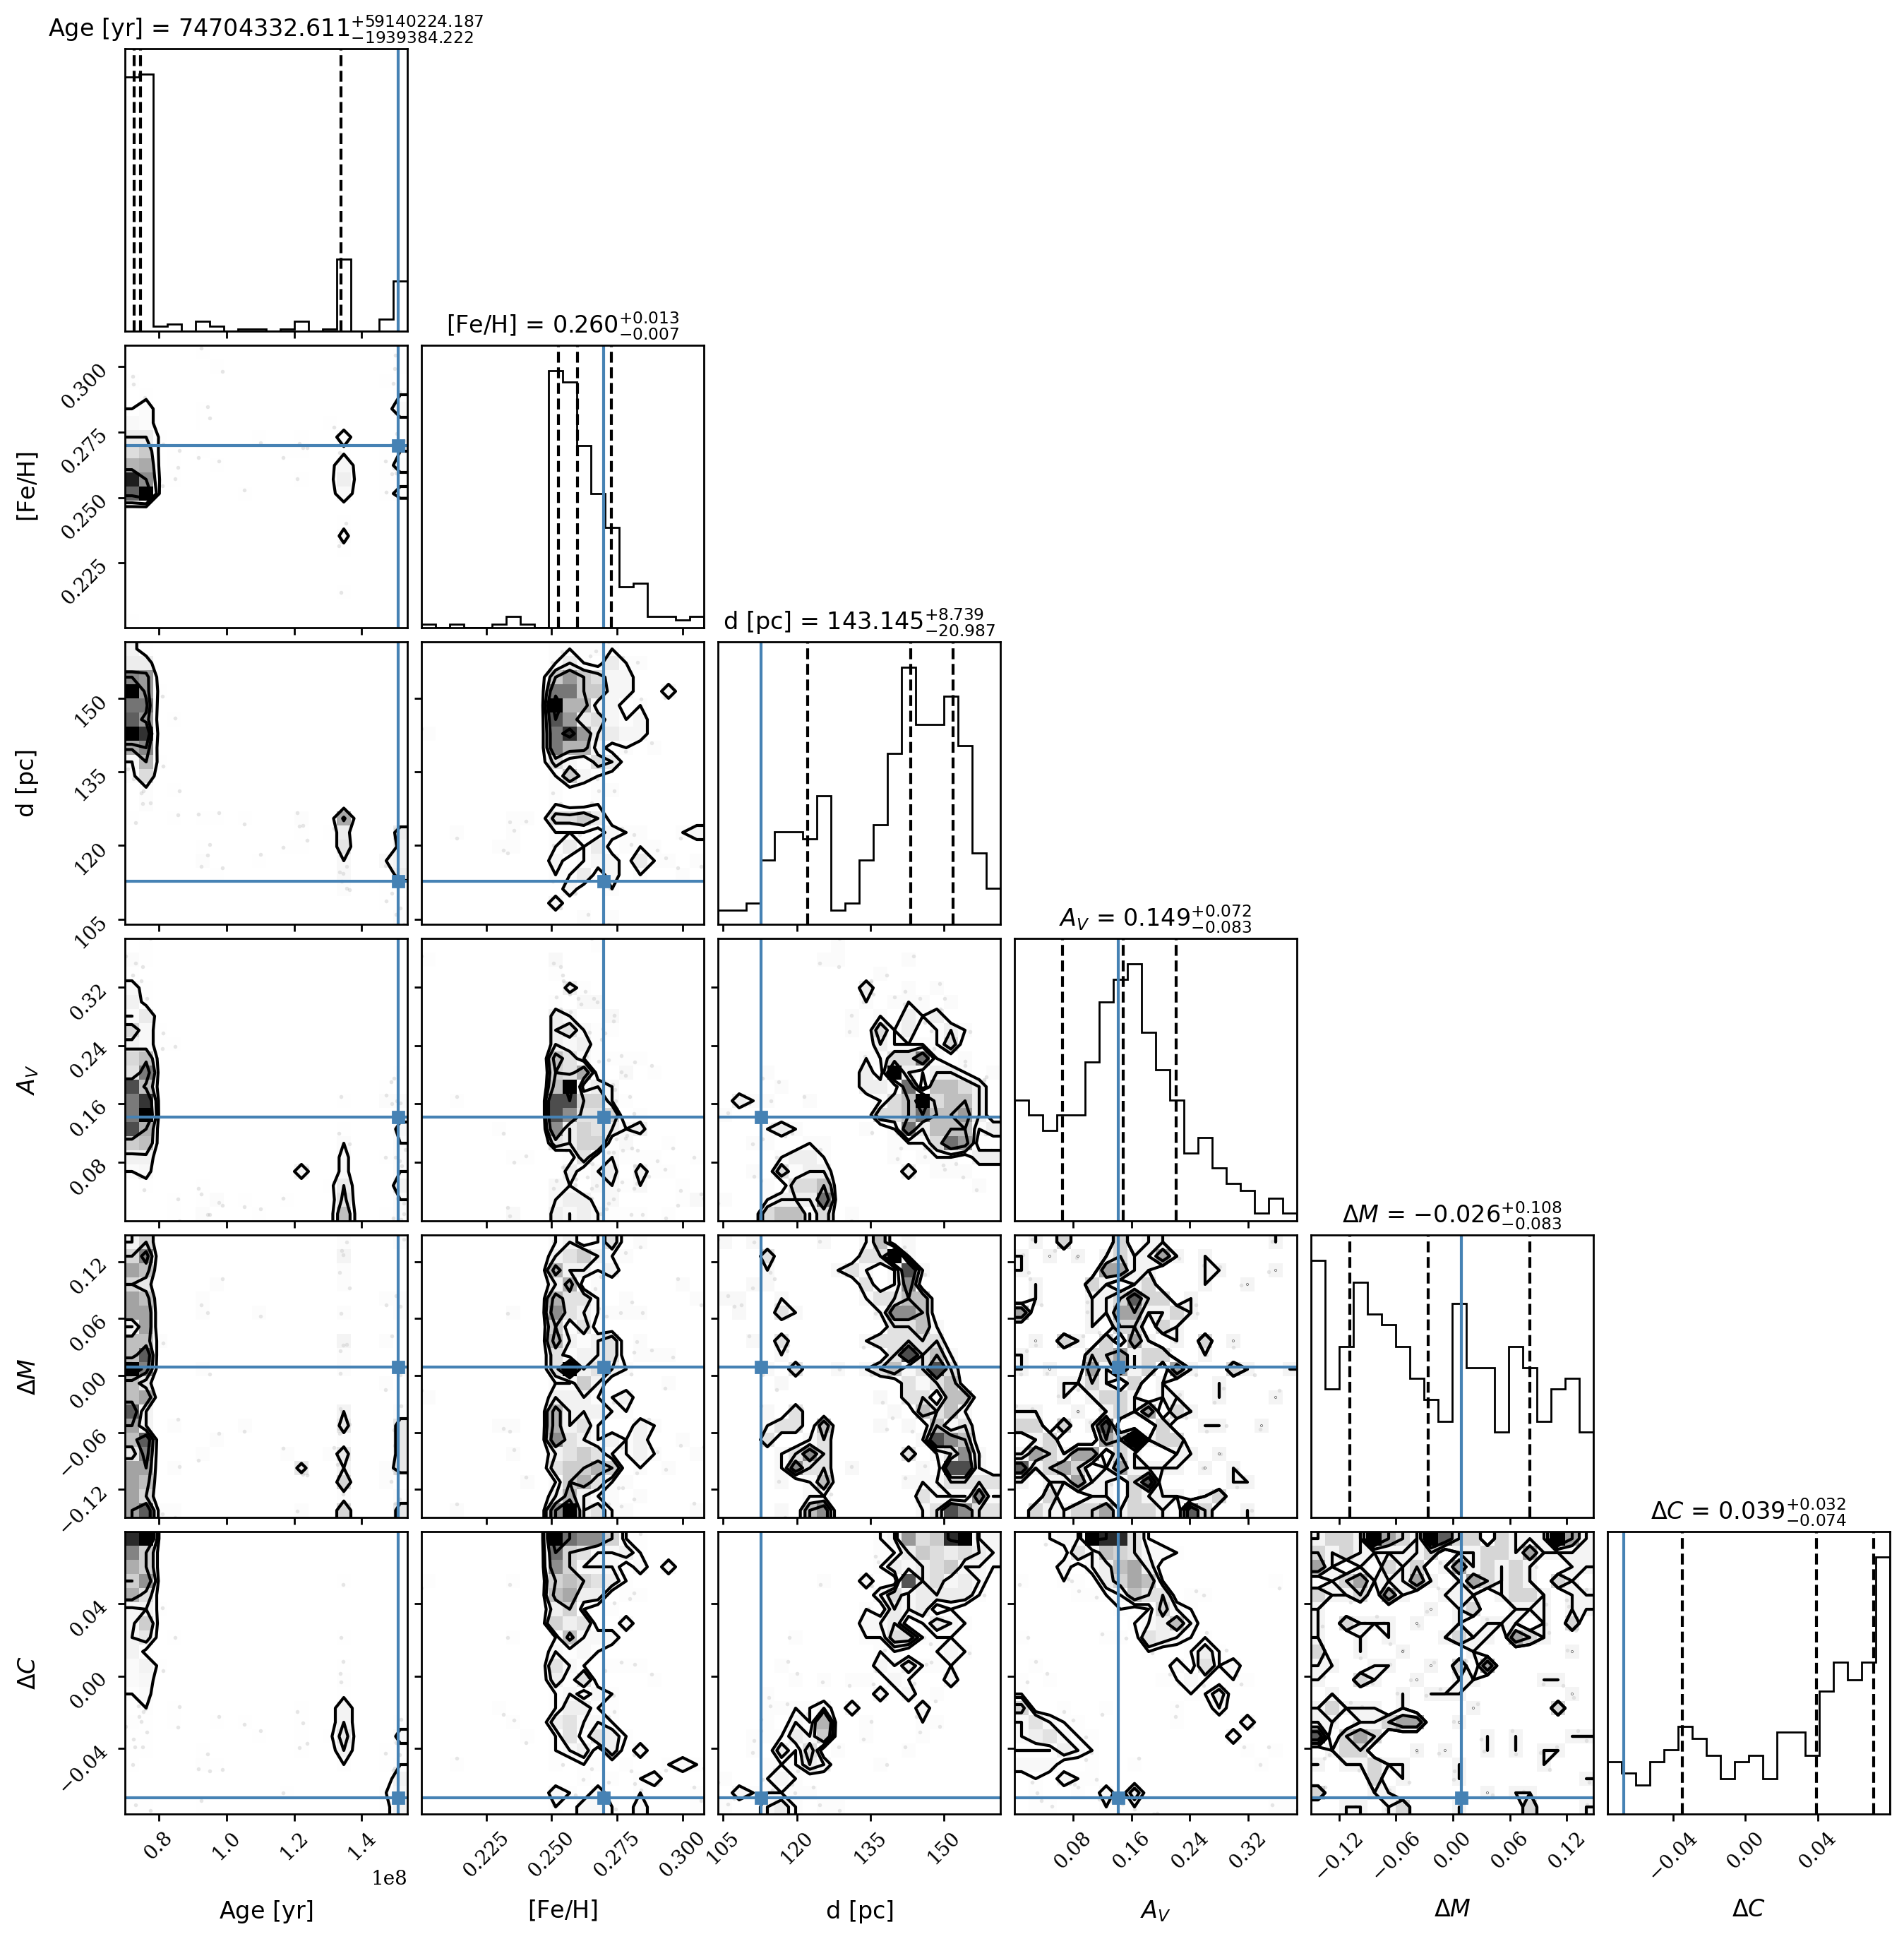

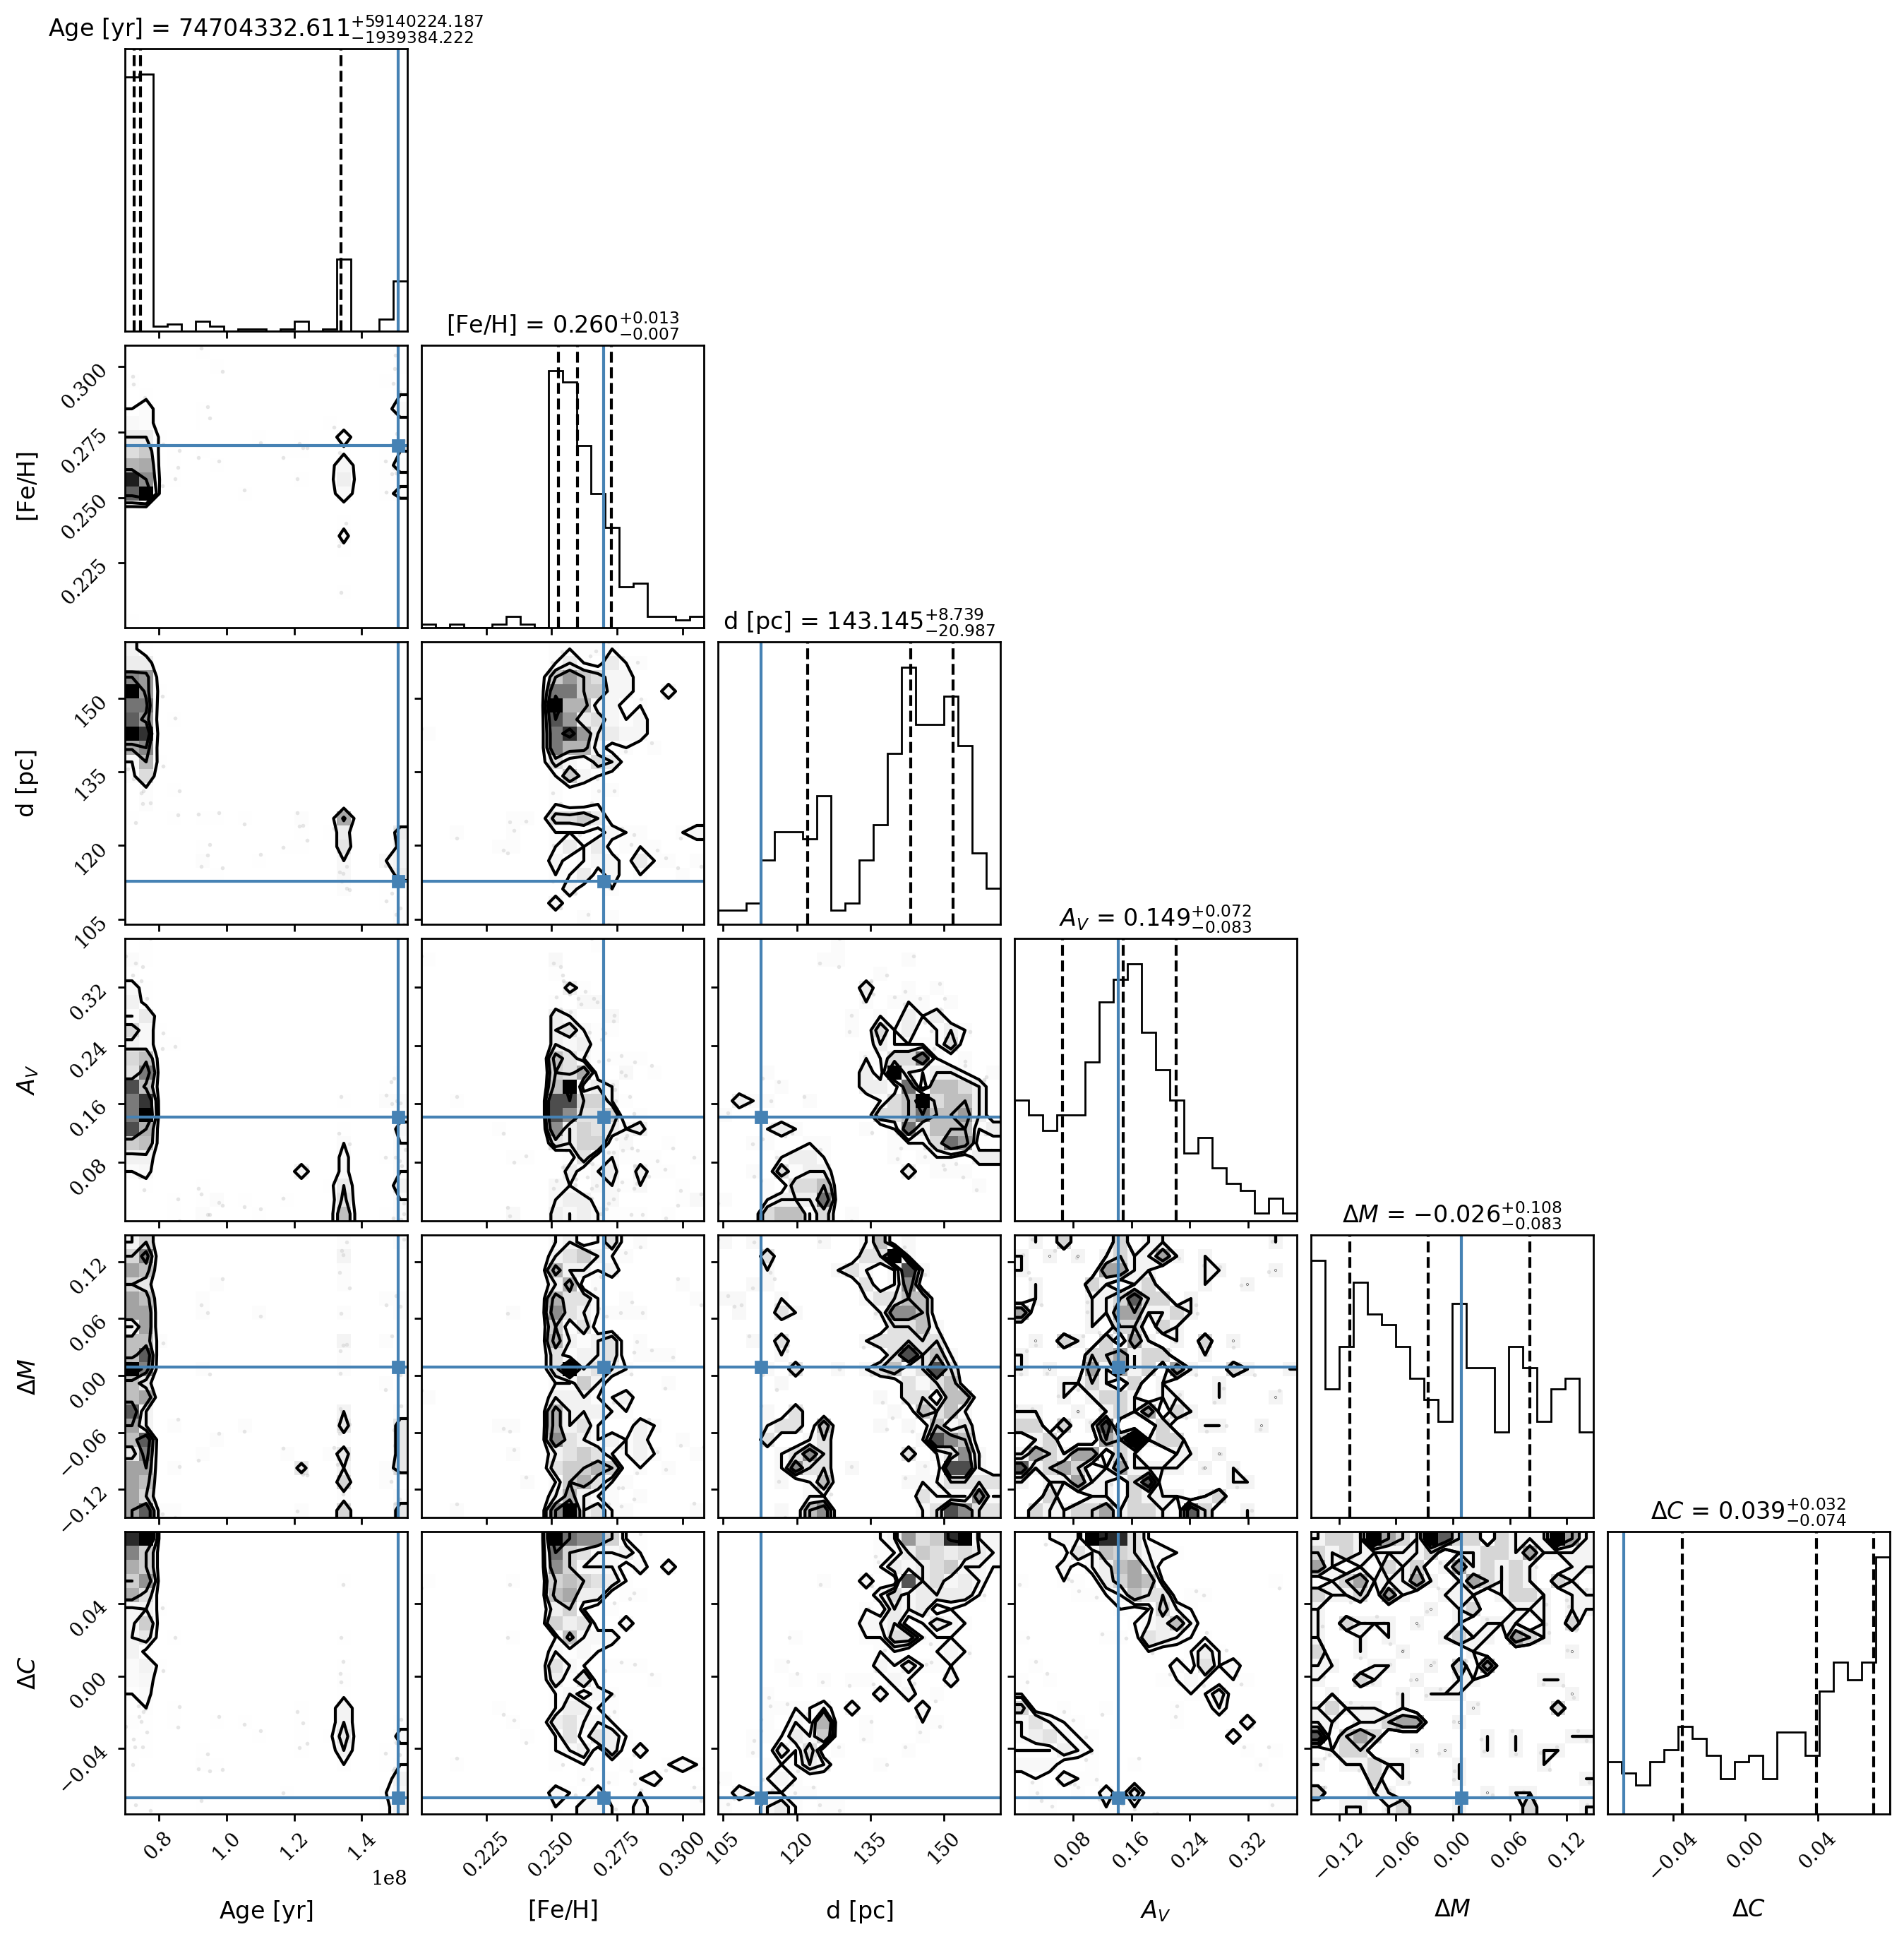

In [12]:
fitter.plot_corner(sampler, discard=200, thin=200)

/var/folders/12/zdvhzg650g17gbnt14_55w_m0000gn/T/ipykernel_29971/3032949427.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  isochrone_df = pd.read_csv('data/mist_isochrone_140Myr.dat', delim_whitespace=True, comment='#')


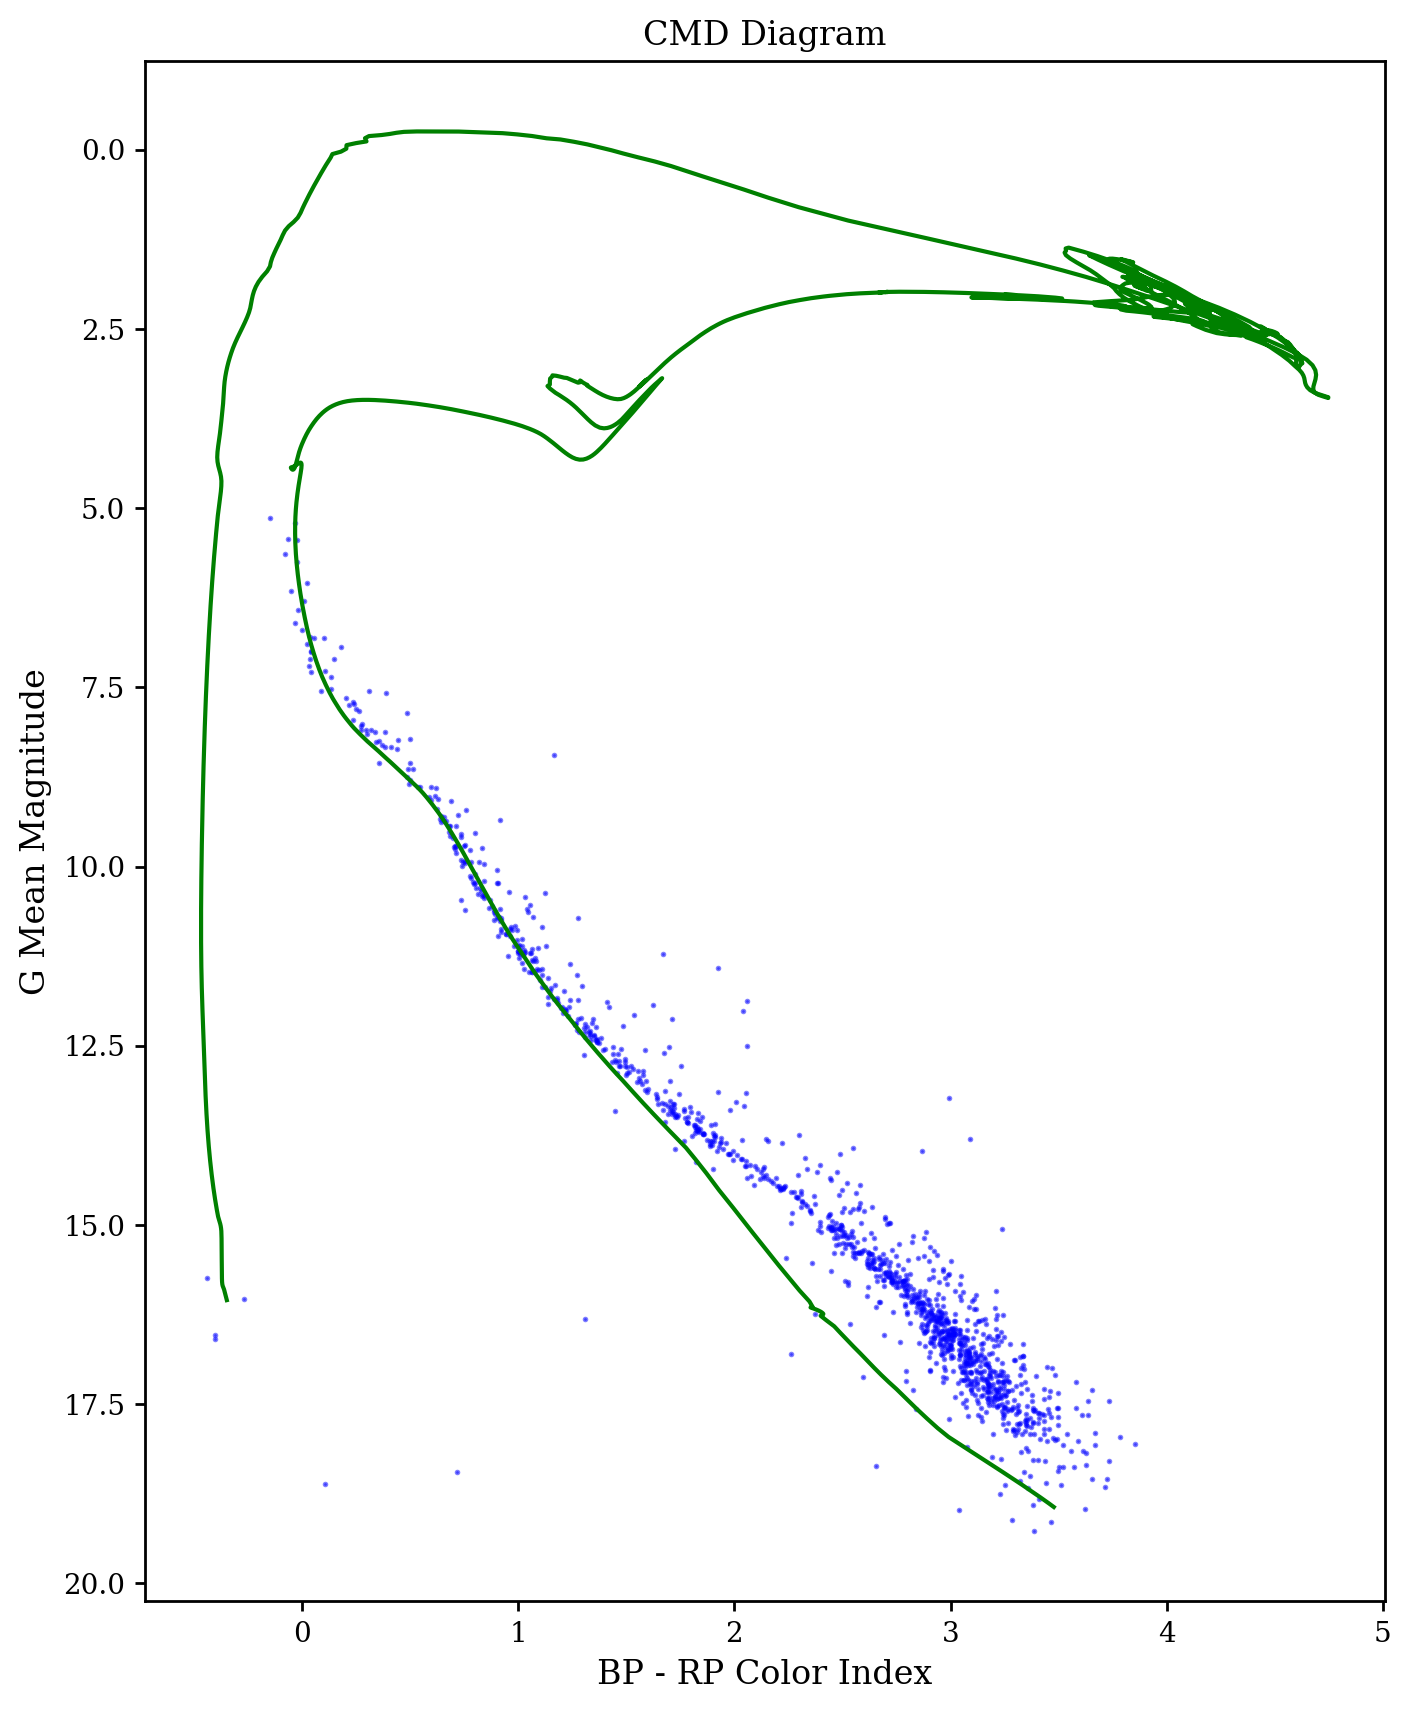

In [13]:
# Testing using actual isochrone
import pandas as pd

isochrone_df = pd.read_csv('data/mist_isochrone_140Myr.dat', delim_whitespace=True, comment='#')
fig, ax = gaia_analyzer.plot_hr_diagram(show=False)

isochrone_df['color'] = isochrone_df['Gaia_BP_EDR3'] - isochrone_df['Gaia_RP_EDR3'] + 0.15
isochrone_df['magnitude'] = isochrone_df['Gaia_G_EDR3'] + 6

ax.plot(isochrone_df['color'], isochrone_df['magnitude'], color='green', label='Isochrone')
plt.show()

In [14]:
from analyzer import BinaryMixtureFitter

binary_fitter = BinaryMixtureFitter(data=df)
binary_fitter.fit(theta=fitter.get_best_model())

print(binary_fitter.get_mixture_weights())

2025-11-13 01:02:22,065 - INFO - Starting EM fit
2025-11-13 01:02:22,065 - INFO - Initial weights: [0.8 0.2 0. ]
  0%|          | 0/40 [00:00<?, ?it/s]2025-11-13 01:02:24,626 - INFO - lnL stats | single: mean=-1.32 max=0.28, binary: mean=-0.65 max=0.17, field: mean=0.00 max=0.00
2025-11-13 01:02:24,628 - INFO - Updated mixture weights: [6.87885486e-01 3.11724954e-01 3.89559797e-04]
  2%|▎         | 1/40 [00:02<01:39,  2.56s/it]2025-11-13 01:02:24,631 - INFO - lnL stats | single: mean=-1.32 max=0.28, binary: mean=-0.65 max=0.17, field: mean=0.00 max=0.00
2025-11-13 01:02:24,631 - INFO - Updated mixture weights: [0.59488559 0.38472693 0.02038748]
2025-11-13 01:02:24,633 - INFO - lnL stats | single: mean=-1.32 max=0.28, binary: mean=-0.65 max=0.17, field: mean=0.00 max=0.00
2025-11-13 01:02:24,634 - INFO - Updated mixture weights: [0.50164307 0.40092385 0.09743308]
2025-11-13 01:02:24,636 - INFO - lnL stats | single: mean=-1.32 max=0.28, binary: mean=-0.65 max=0.17, field: mean=0.00 max=0

[0.24565985 0.26545057 0.48888958]


In [15]:
binary_fitter.get_probability("796443724462555904")

2025-11-13 01:02:24,752 - INFO - lnL stats | single: mean=-1.32 max=0.28, binary: mean=-0.65 max=0.17, field: mean=0.00 max=0.00


{'single': 6.20154663053205e-09,
 'binary': 7.458847343204284e-09,
 'field': 0.9999999863396061}

In [18]:
# No need for a specialized method for this
chulkov_df = pd.read_csv('data/chulkov_binaries.csv')
chulkov_source_ids = chulkov_df['Gaia1']

for source_id in chulkov_source_ids:
    try:
        print(binary_fitter.get_probability(source_id))
    except ValueError as e:
        logging.error(f"Oops! {e}")

2025-11-13 01:05:21,816 - INFO - lnL stats | single: mean=-1.32 max=0.28, binary: mean=-0.65 max=0.17, field: mean=0.00 max=0.00
2025-11-13 01:05:21,825 - INFO - lnL stats | single: mean=-1.32 max=0.28, binary: mean=-0.65 max=0.17, field: mean=0.00 max=0.00
2025-11-13 01:05:21,831 - INFO - lnL stats | single: mean=-1.32 max=0.28, binary: mean=-0.65 max=0.17, field: mean=0.00 max=0.00
2025-11-13 01:05:21,835 - INFO - lnL stats | single: mean=-1.32 max=0.28, binary: mean=-0.65 max=0.17, field: mean=0.00 max=0.00
2025-11-13 01:05:21,836 - ERROR - Oops! Source ID 66486510358371072 not found in dataset.
2025-11-13 01:05:21,839 - INFO - lnL stats | single: mean=-1.32 max=0.28, binary: mean=-0.65 max=0.17, field: mean=0.00 max=0.00
2025-11-13 01:05:21,841 - ERROR - Oops! Source ID 65282716922610944 not found in dataset.
2025-11-13 01:05:21,846 - INFO - lnL stats | single: mean=-1.32 max=0.28, binary: mean=-0.65 max=0.17, field: mean=0.00 max=0.00
2025-11-13 01:05:21,848 - INFO - lnL stats | s

{'single': 0.2952706530328066, 'binary': 0.29161516921694686, 'field': 0.41311417775024656}
{'single': 0.3023626256981508, 'binary': 0.2980076578944703, 'field': 0.3996297164073789}
{'single': 0.28467179238421925, 'binary': 0.2959774192753911, 'field': 0.41935078834038964}
{'single': 0.20888751905861264, 'binary': 0.2788312910916792, 'field': 0.5122811898497082}
{'single': 0.2971388960053746, 'binary': 0.2946699172966289, 'field': 0.40819118669799653}
{'single': 0.23897737930135932, 'binary': 0.28687617994124476, 'field': 0.47414644075739587}
{'single': 0.30242608032805496, 'binary': 0.29790264254537496, 'field': 0.39967127712656997}
{'single': 0.2893319205182781, 'binary': 0.29649998209380757, 'field': 0.4141680973879143}
{'single': 0.2903076183887369, 'binary': 0.2917479609635153, 'field': 0.4179444206477478}
{'single': 0.29949344113413895, 'binary': 0.29798511356701884, 'field': 0.40252144529884215}
{'single': 0.29124205874389475, 'binary': 0.2956917470035822, 'field': 0.41306619425

In [19]:
from downloader import LightCurveExtractor

lightcurve_analyzer = LightCurveExtractor(download_dir='lightcurves/')

# ids = gaia_analyzer.extract_source_ids()[:10]
# lightcurves = lightcurve_analyzer.extract_gaia_lightcurves(ids)

ids = gaia_analyzer.extract_source_ids()
lightcurves = lightcurve_analyzer.extract_eb_lightcurves(ids)

2025-11-13 01:05:49,131 - INFO - Set Lightkurve download directory to lightcurves/
2025-11-13 01:05:49,132 - INFO - Using cached TESS EB catalog at data/tess_eb_catalog.csv
2025-11-13 01:06:16,088 - WARNING - No TIC match for 3 Gaia IDs: [67680850564641792, 70190249631846272, 52035251073077120]...
  0%|          | 0/1276 [00:00<?, ?it/s]2025-11-13 01:06:16,089 - INFO - Inspecting for EB membership: Gaia 3763976194792448 -> TIC 377056867
2025-11-13 01:06:16,090 - INFO - Inspecting for EB membership: Gaia 11352324413414016 -> TIC 416678539
2025-11-13 01:06:16,090 - INFO - Inspecting for EB membership: Gaia 19817739313090688 -> TIC 620010441
2025-11-13 01:06:16,090 - INFO - Inspecting for EB membership: Gaia 43733079289895424 -> TIC 434162270
2025-11-13 01:06:16,091 - INFO - Inspecting for EB membership: Gaia 46438771249859840 -> TIC 456886532
2025-11-13 01:06:16,091 - INFO - Inspecting for EB membership: Gaia 46922075328601216 -> TIC 15938971
2025-11-13 01:06:16,091 - INFO - Inspecting f

In [20]:
lightcurves

{'796443724462555904': (array([1870.45060174, 1870.45199067, 1870.4533796 , ..., 2635.9877195 ,
         2635.98910834, 2635.99049718]),
  MaskedNDArray([1.00473648, 1.01404445, 0.99949069, ..., 1.00142591,
                 0.99244537, 0.99750349]),
  <TessLightCurve length=31866 LABEL="TIC 67646988" SECTOR=48 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>
         time             flux      ...   pos_corr1      pos_corr2   
                                    ...      pix            pix      
         Time           float64     ...    float32        float32    
  ------------------ -------------- ... -------------- --------------
   1870.450601743111  1.0047365e+00 ...  2.3839397e-02 -8.5121281e-02
   1870.451990670987  1.0140445e+00 ...  2.2470890e-02 -8.9913927e-02
  1870.4533795988639  9.9949069e-01 ...  2.3171166e-02 -9.1443755e-02
    1870.45476852674  1.0114602e+00 ...  2.4238938e-02 -8.2975447e-02
   1870.456157455082  1.0098795e+00 ...  2.1894285e-02 -8.7038614e-02
  1870.4575463829578 

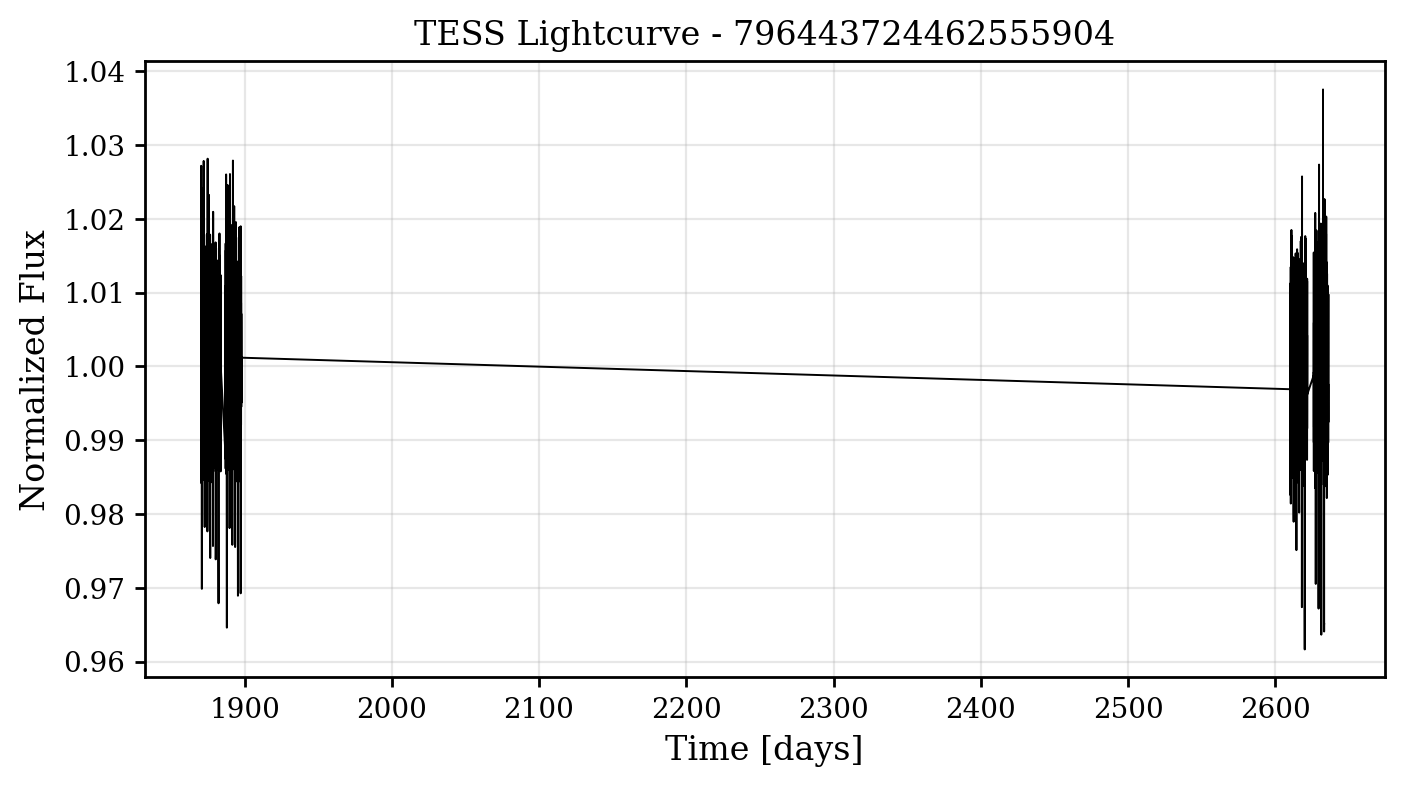

In [21]:
from analyzer import TESSAnalyzer

tess_analyzer = TESSAnalyzer(lightcurves=lightcurves)
tess_analyzer.batch_plot()

2025-11-13 01:08:13,997 - INFO - Analyzing lightcurve for 796443724462555904


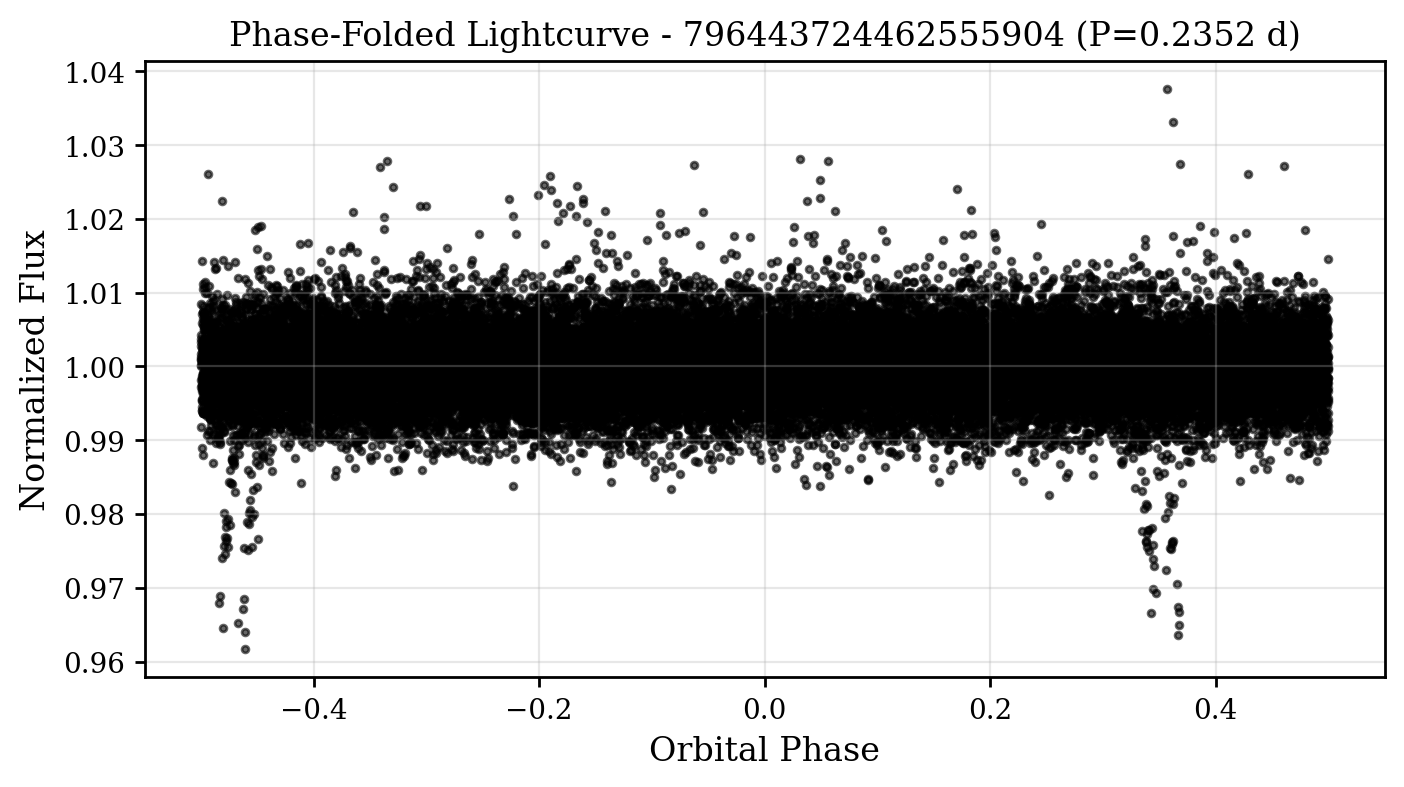

In [22]:
results = tess_analyzer.batch_analyze()
tess_analyzer.batch_plot_folded()

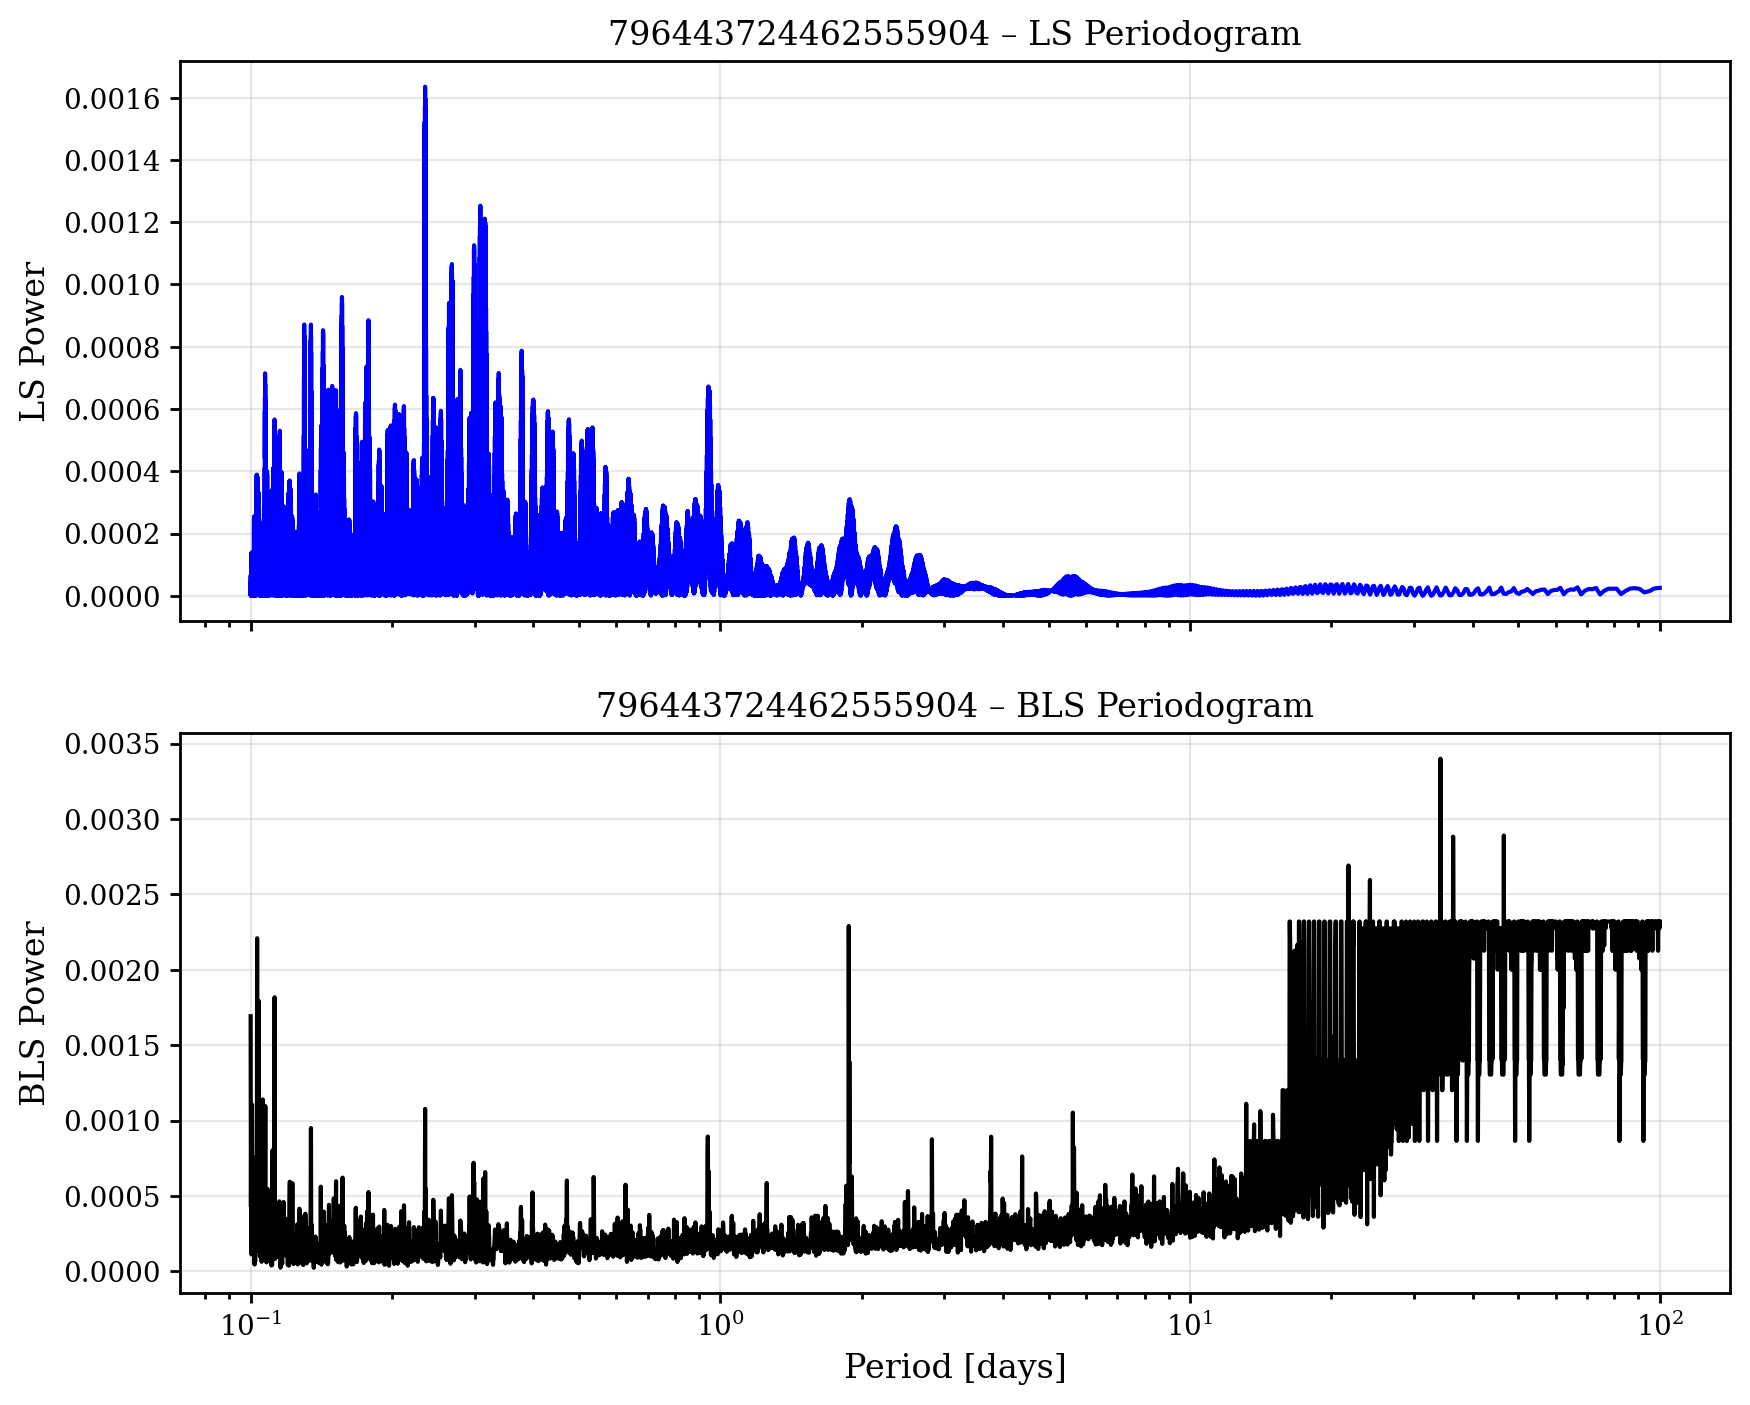

In [23]:
tess_analyzer.batch_plot_periodograms()

2025-11-13 01:08:29,757 - INFO - lnL stats | single: mean=-1.32 max=0.28, binary: mean=-0.65 max=0.17, field: mean=0.00 max=0.00


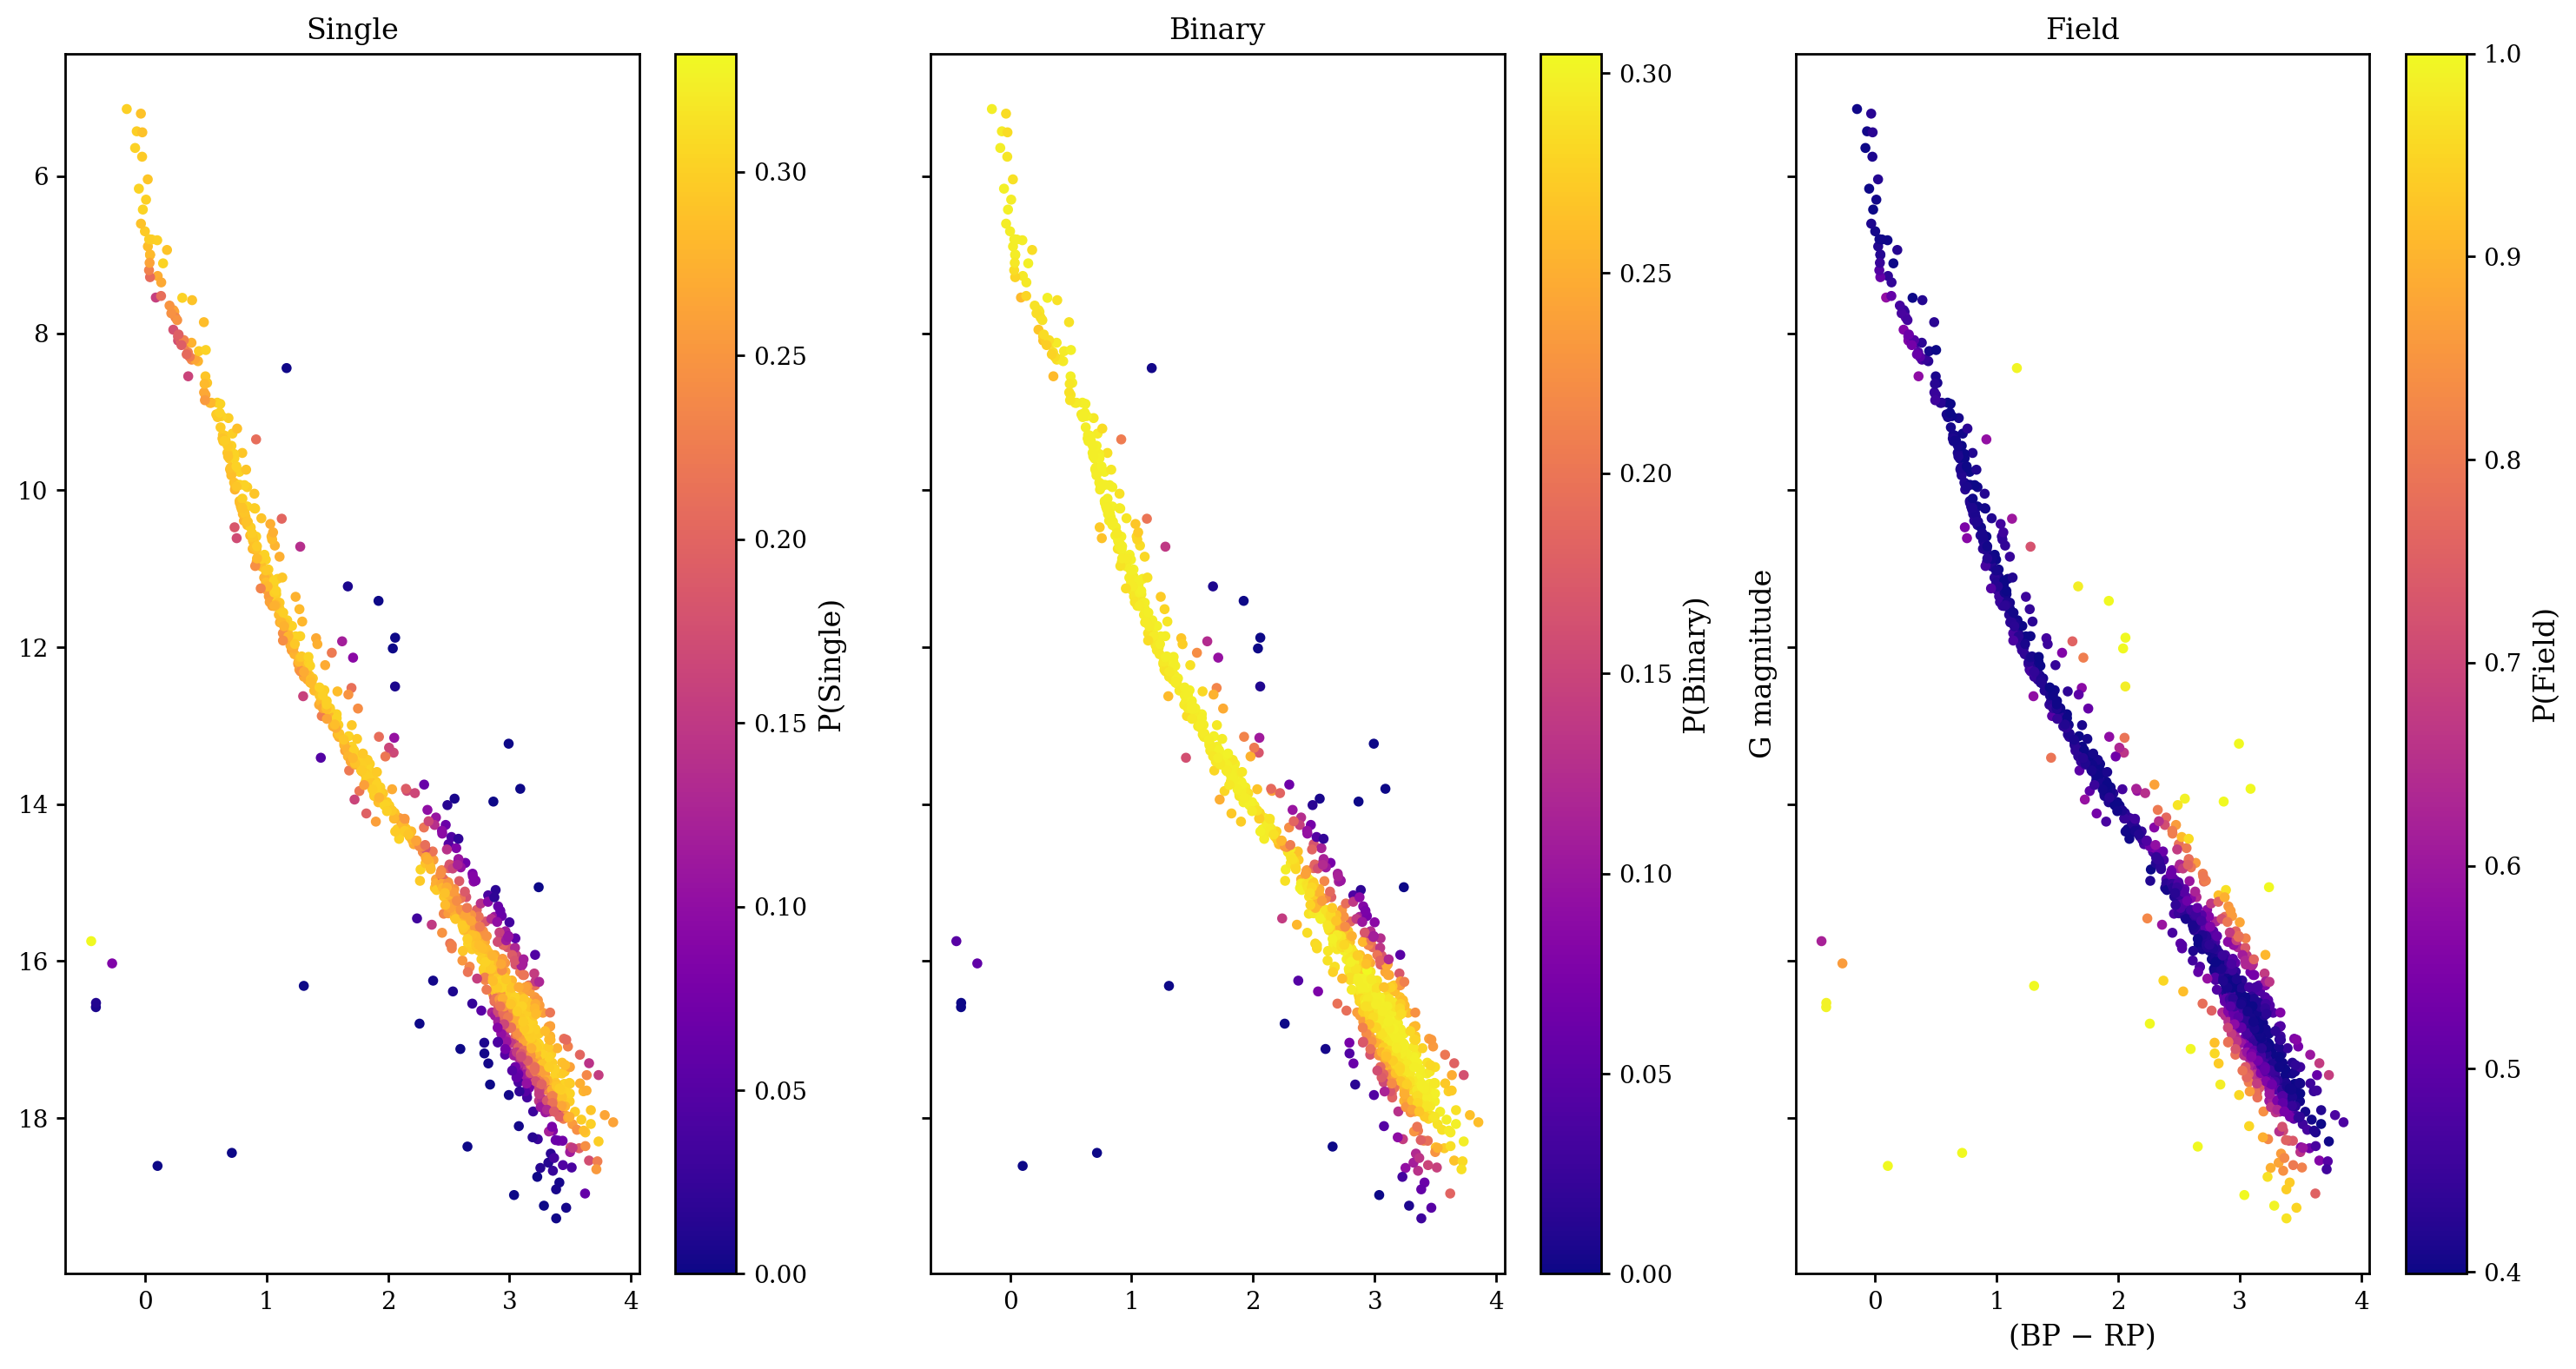

(<Figure size 1500x800 with 6 Axes>,
 <Axes: title={'center': 'Field'}, xlabel='(BP − RP)', ylabel='G magnitude'>)

In [24]:
binary_fitter.plot()


In [27]:
from generator import IsochroneSynthesizer

synthesizer = IsochroneSynthesizer()
df = synthesizer.generate(1000)
df.head()

mass_0  initial_mass_0    logL_0    Mbol_0       Teff_0  logTeff_0  \
0  0.987361        0.987400 -0.108238  5.010596  5688.099913   3.754896   
1  1.081855        1.082032  0.258318  4.094204  6276.752336   3.797578   
2  0.821631        0.821694 -0.428888  5.812220  5119.787247   3.709144   
3  1.455675        1.456022  0.815662  2.700845  7177.579422   3.855573   
4  1.025182        1.025339  0.154298  4.354254  6138.504569   3.787921   

   phase_0  delta_nu_0     feh_0  density_0  ...     A_G_1    A_BP_1  \
0      0.0  161.955249  0.049696   1.851343  ...  0.162585  0.211811   
1      0.0  120.796652 -0.223739   1.032137  ...       NaN       NaN   
2      0.0  187.120354  0.004904   2.479874  ...       NaN       NaN   
3      0.0   75.523167 -0.078490   0.452747  ...       NaN       NaN   
4      0.0  131.906656 -0.218591   1.225451  ...  0.039517  0.054240   

     A_RP_1      G_mag       A_G     BP_mag      A_BP     RP_mag      A_RP  \
0  0.132656  17.095470  0.180566  17.499064  0.225257  16.524553  0.136537   
1       NaN  16.281903  0.020253  16.526983  0.024833  15.875609  0.014785   
2       NaN  15.576429  0.056073  16.023680  0.070167  14.971142  0.043105   
3       NaN  14.786678  0.026831  14.940920  0.032259  14.510171  0.019054   
4  0.033319  16.114667  0.048754  16.387705  0.059997  15.675325  0.035797   

   phot_bp_rp  
0    0.974512  
1    0.651374  
2    1.052538  
3    0.430749  
4    0.712380  

[5 rows x 63 columns]

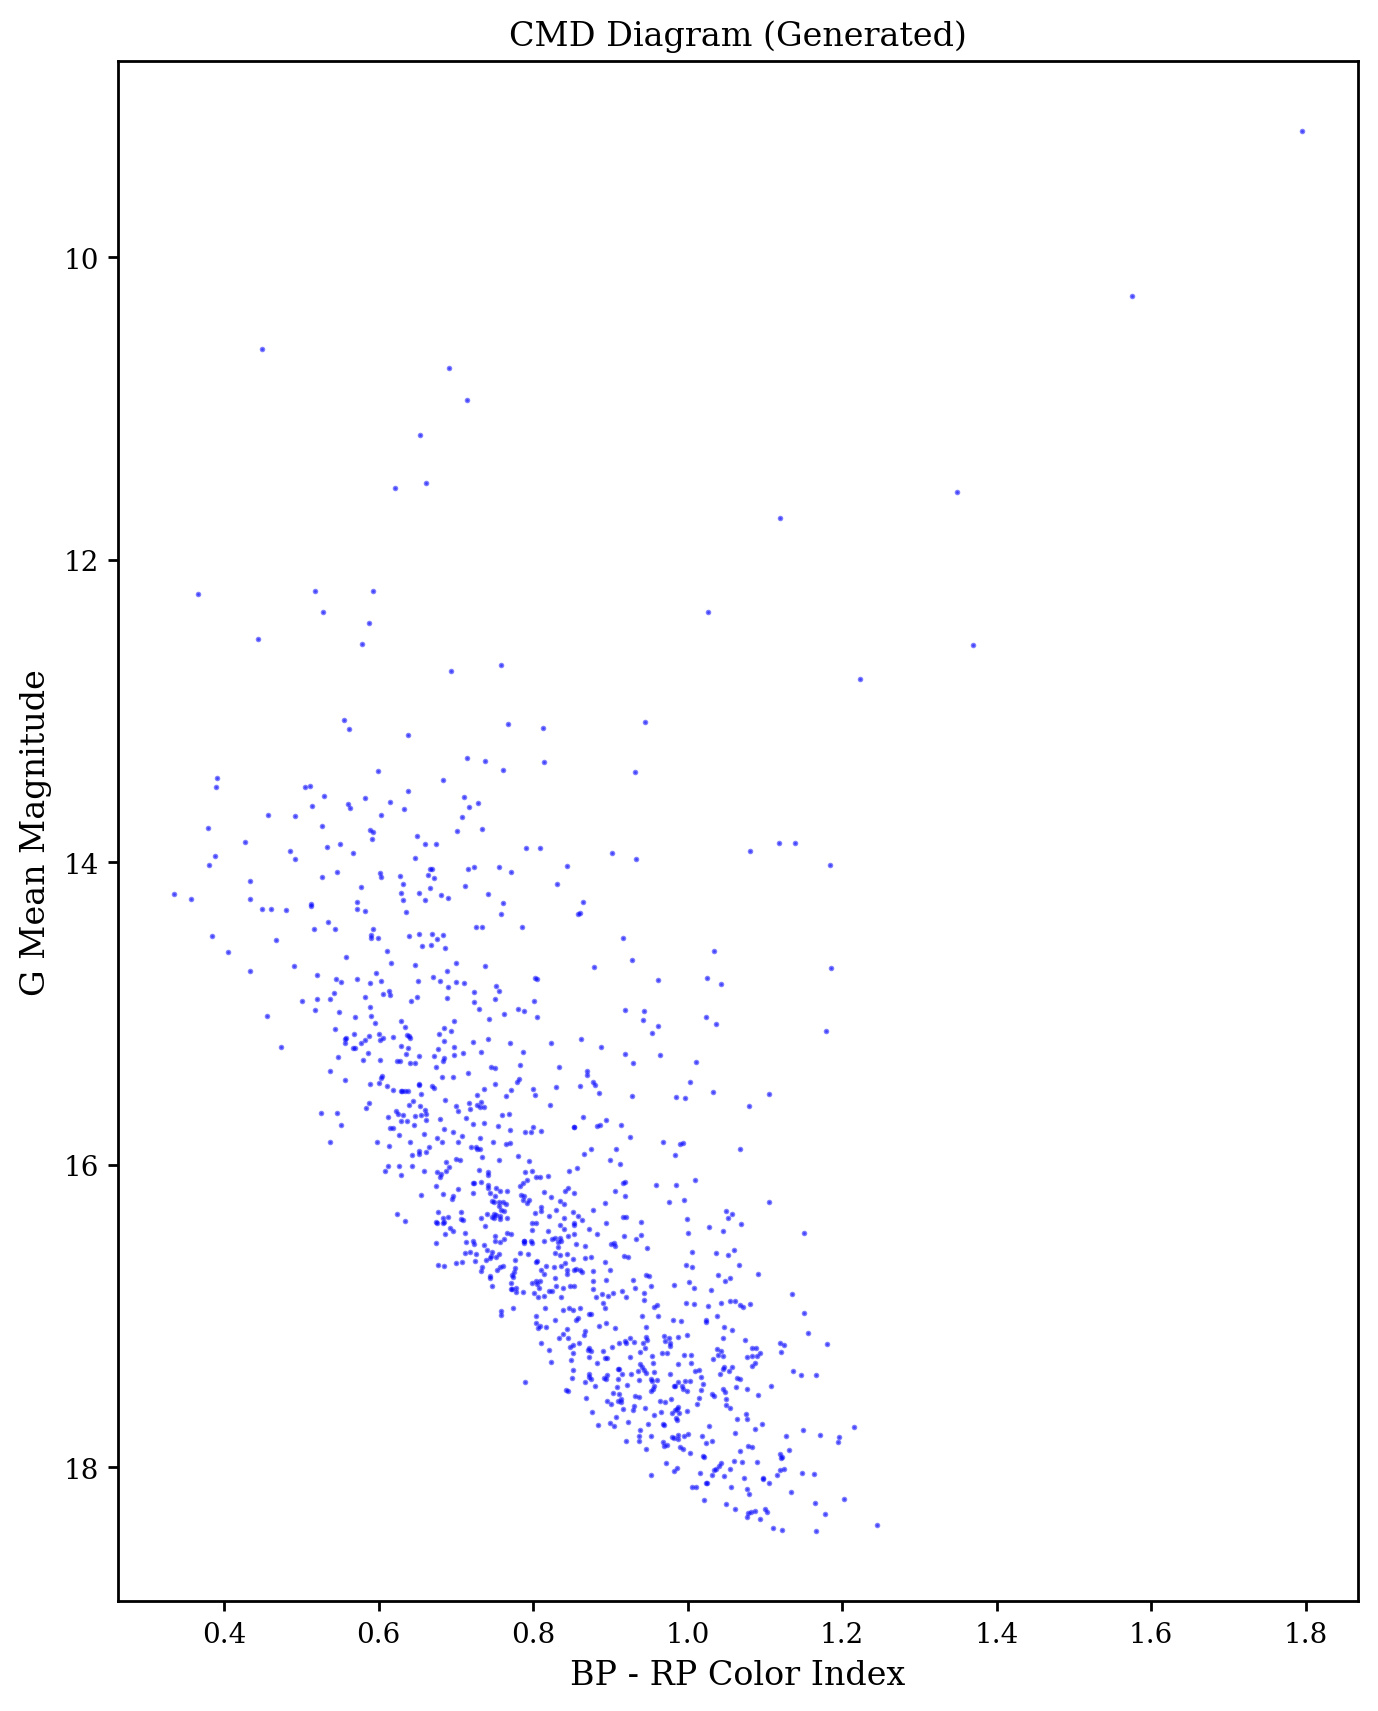

(<Figure size 800x1000 with 1 Axes>,
 <Axes: title={'center': 'CMD Diagram (Generated)'}, xlabel='BP - RP Color Index', ylabel='G Mean Magnitude'>)

In [26]:
synthesizer.plot_hr_diagram()

In [28]:
synthetic_fitter = MISTFitter(data=df)

In [29]:
synthetic_sampler = synthetic_fitter.sample_cluster(n_walkers=32, n_burn=200, n_steps=1000)

100%|██████████| 1000/1000 [03:19<00:00,  5.02it/s]


2025-11-13 01:16:25,590 - WARNING - Too few points to create valid contours
2025-11-13 01:16:25,618 - WARNING - Too few points to create valid contours
2025-11-13 01:16:25,644 - WARNING - Too few points to create valid contours
2025-11-13 01:16:25,677 - WARNING - Too few points to create valid contours
2025-11-13 01:16:25,716 - WARNING - Too few points to create valid contours


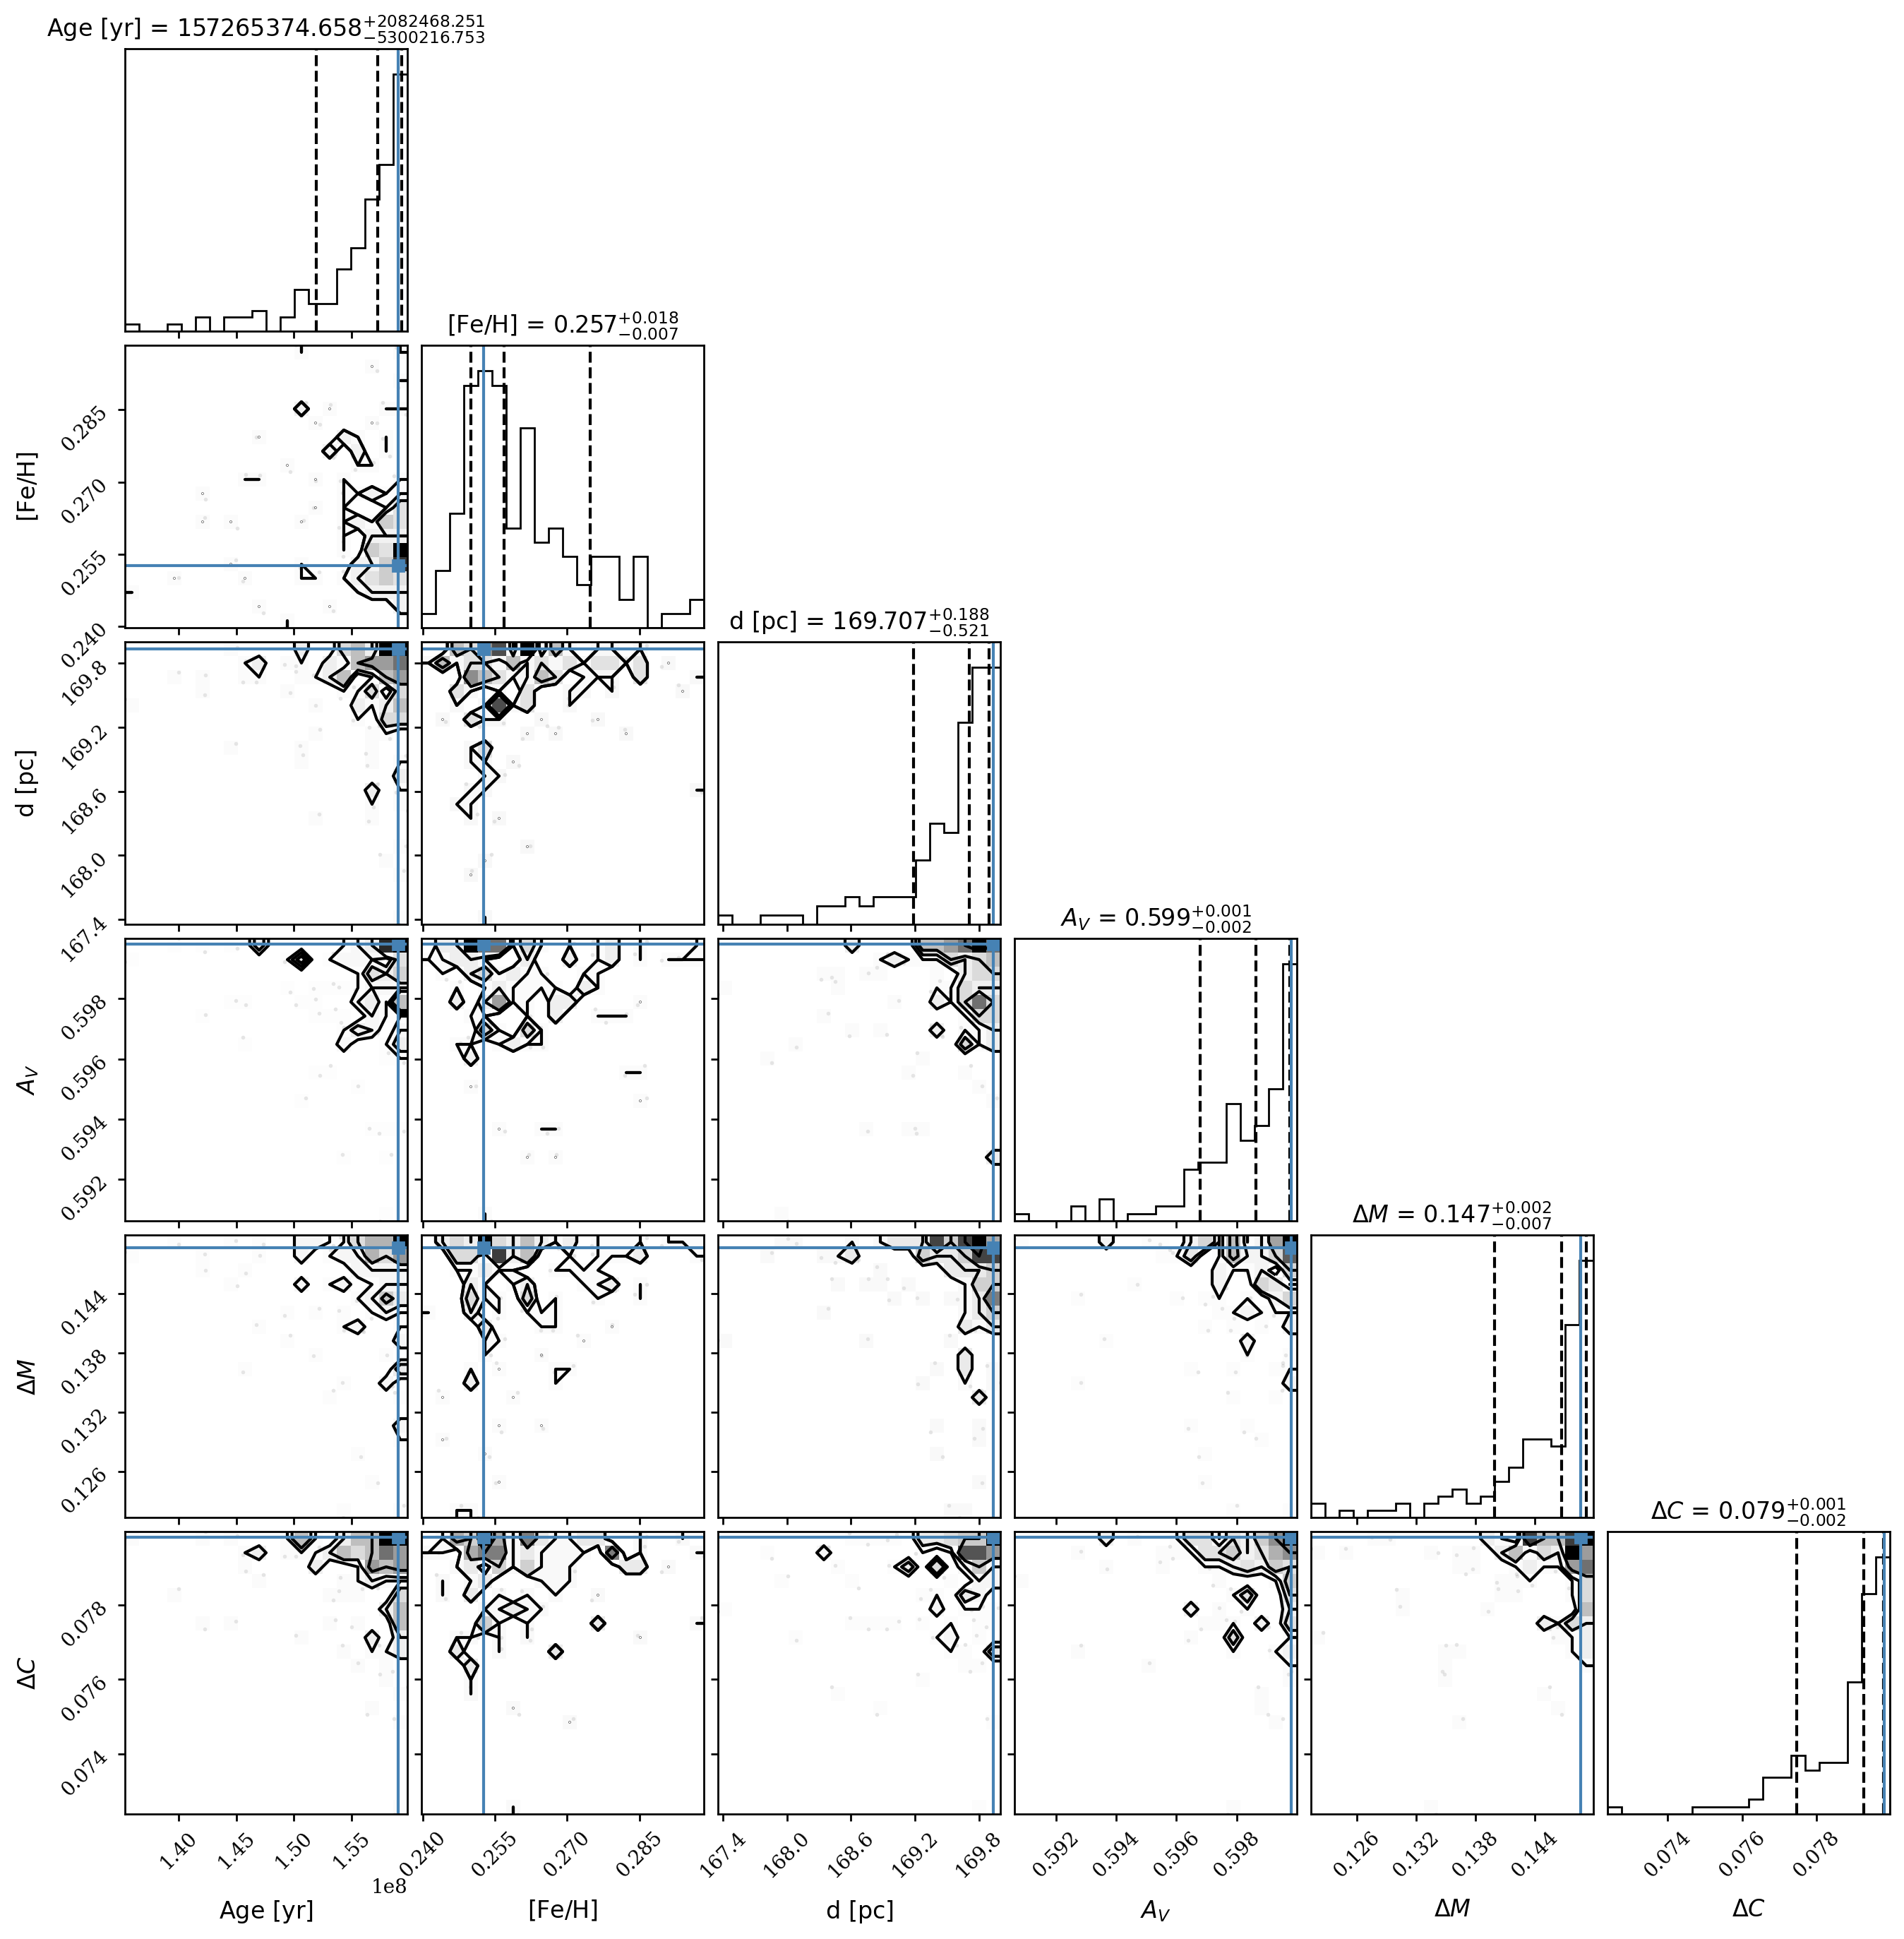

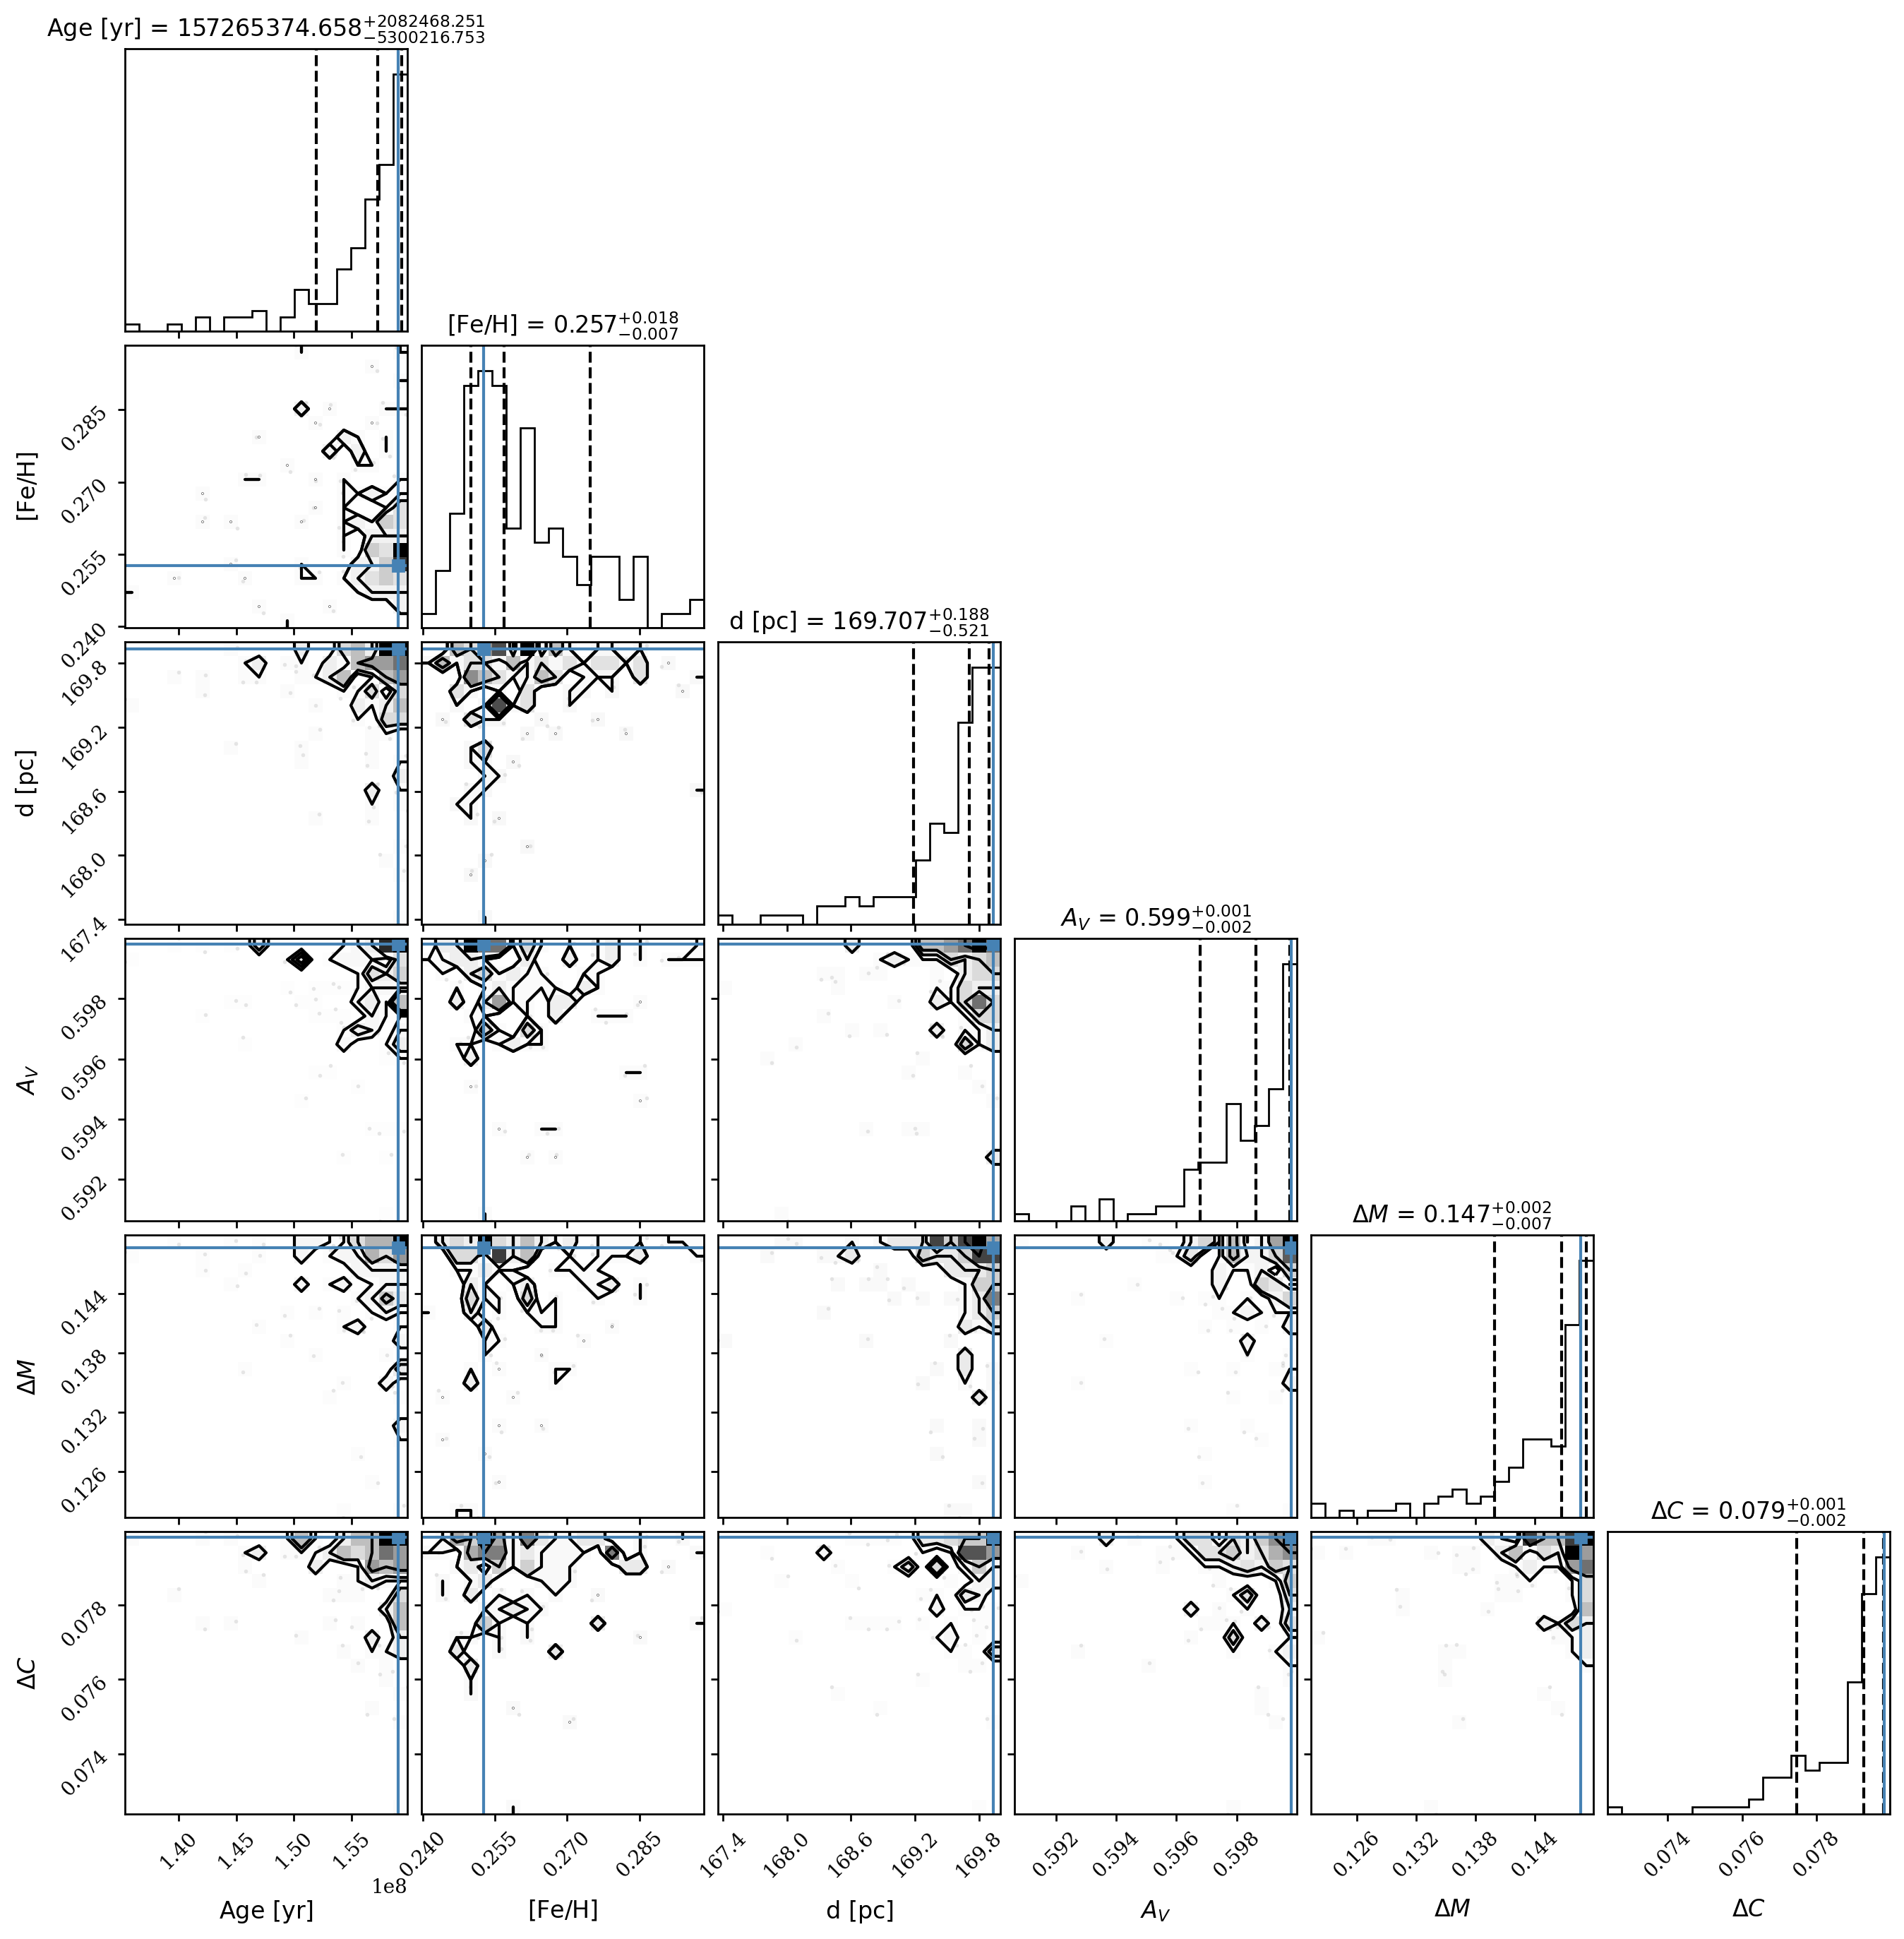

In [30]:
synthetic_fitter.plot_corner(synthetic_sampler, discard=200, thin=200)

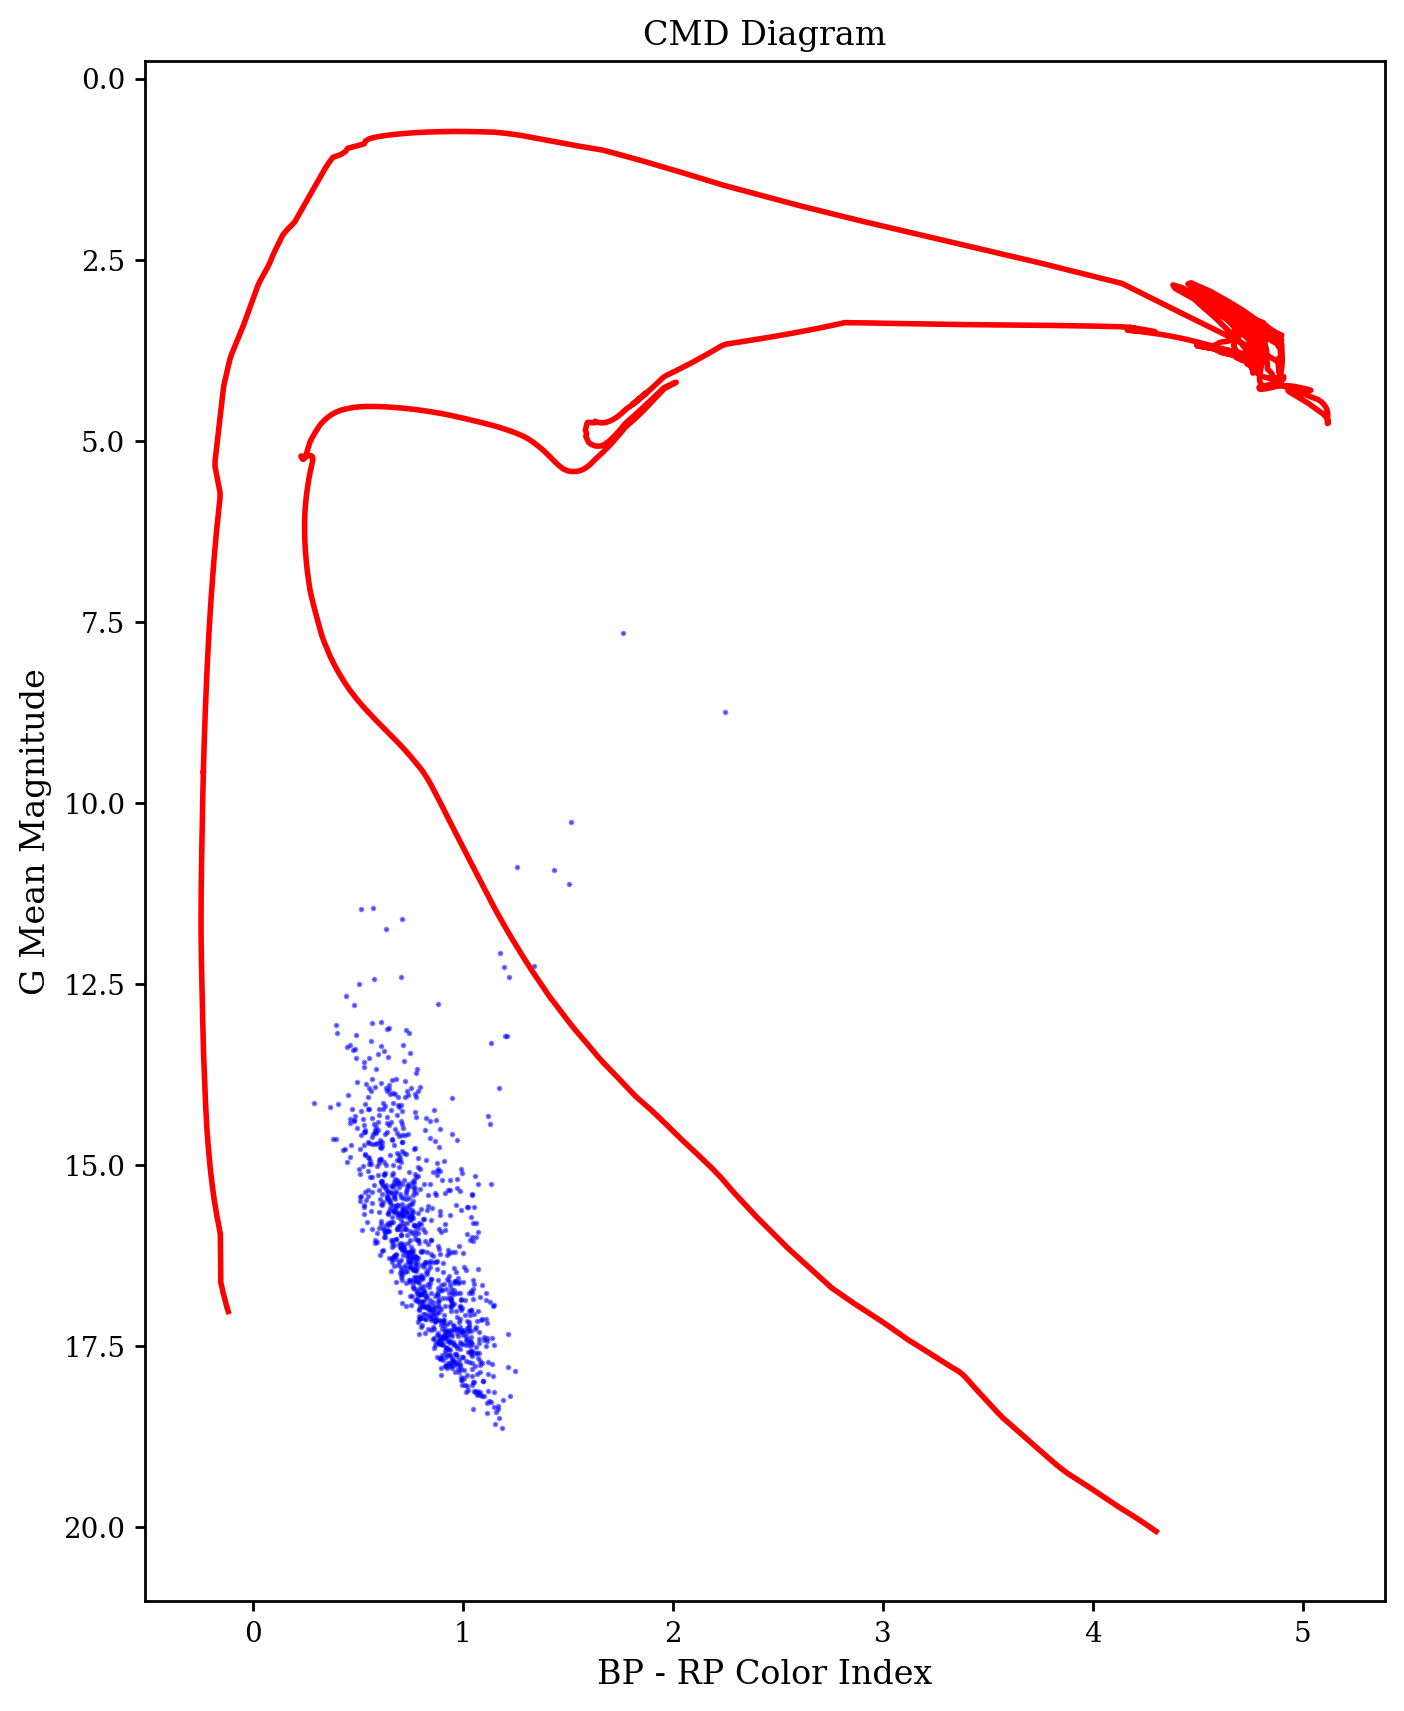

(<Figure size 800x1000 with 1 Axes>,
 <Axes: title={'center': 'CMD Diagram'}, xlabel='BP - RP Color Index', ylabel='G Mean Magnitude'>)

In [31]:
# Step 5: plot best model
best_params = synthetic_fitter.get_best_model()

# Step 4: Plot median
synthetic_fitter.plot_isochrone(best_params)

In [32]:
from analyzer import BinaryMixtureFitter

synthetic_binary_fitter = BinaryMixtureFitter(data=df)
synthetic_binary_fitter.fit(theta=synthetic_fitter.get_best_model())

print(synthetic_binary_fitter.get_mixture_weights())

2025-11-13 01:17:21,480 - INFO - Starting EM fit
2025-11-13 01:17:21,481 - INFO - Initial weights: [0.8 0.2 0. ]
  0%|          | 0/40 [00:00<?, ?it/s]2025-11-13 01:17:23,711 - INFO - lnL stats | single: mean=-2.41 max=18.67, binary: mean=-1.09 max=15.12, field: mean=0.00 max=0.00
2025-11-13 01:17:23,712 - INFO - Updated mixture weights: [5.99734527e-01 3.99769195e-01 4.96277916e-04]
  2%|▎         | 1/40 [00:02<01:26,  2.23s/it]2025-11-13 01:17:23,714 - INFO - lnL stats | single: mean=-2.41 max=18.67, binary: mean=-1.09 max=15.12, field: mean=0.00 max=0.00
2025-11-13 01:17:23,715 - INFO - Updated mixture weights: [0.4711042 0.3876928 0.141203 ]
2025-11-13 01:17:23,717 - INFO - lnL stats | single: mean=-2.41 max=18.67, binary: mean=-1.09 max=15.12, field: mean=0.00 max=0.00
2025-11-13 01:17:23,718 - INFO - Updated mixture weights: [0.37961271 0.25326607 0.36712122]
2025-11-13 01:17:23,720 - INFO - lnL stats | single: mean=-2.41 max=18.67, binary: mean=-1.09 max=15.12, field: mean=0.00 

[0.37156025 0.16074277 0.46769698]


In [ ]:
synthetic_fitter.plot_good_isochrones(chi2_cutoff=1)

In [ ]:
synthetic_binary_fitter.plot()